In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.graphics.gofplots import qqplot
import re
import os

In [2]:
import warnings
warnings.simplefilter('ignore')
os.chdir(r"D:\SCALERES\JupuyterNotebook\Delhivery")

In [3]:
df = pd.read_csv('delhivery_data.csv')

In [4]:
df.sample(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
122606,training,2018-09-23 14:18:13.981195,thanos::sroute:bc7dbb1d-9379-4674-b8d3-f9c3b96...,FTL,trip-153771229398079221,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND712311AAA,Kolkata_Dankuni_HB (West Bengal),2018-09-23 14:18:13.981195,...,2018-09-24 02:25:21,1056.185394,1530.0,804.0,1138.5509,1.902985,32.0,23.0,33.0392,1.391304
29825,training,2018-09-15 20:09:00.426097,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153704214147054167,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-09-16 06:15:11.901239,...,2018-09-17 15:42:52,748.130833,1067.0,693.0,890.0443,1.539683,23.0,14.0,20.6056,1.642857
17283,test,2018-10-03 00:01:00.774939,thanos::sroute:38b8257c-1dae-4f7a-b762-009145e...,FTL,trip-153852486077464126,IND458664AAA,Neemuch_KarjuDPP_D (Madhya Pradesh),IND312403AAA,BariSadri_BhmprDPP_D (Rajasthan),2018-10-03 03:26:55.967741,...,2018-10-03 04:29:32,22.058295,42.0,24.0,27.0182,1.750000,42.0,24.0,27.0182,1.750000
46455,test,2018-09-28 22:25:15.504856,thanos::sroute:caf62782-95cc-4d47-a071-d1c7038...,FTL,trip-153817351550461336,IND501359AAE,Hyderabad_Shamshbd_H (Telangana),IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),2018-09-28 22:25:15.504856,...,2018-09-29 15:09:01,176.096294,335.0,155.0,220.4411,2.161290,62.0,30.0,43.0600,2.066667
34713,training,2018-09-19 19:53:42.622678,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153738682262223442,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-09-20 06:25:35.030407,...,2018-09-21 23:30:31,484.678612,744.0,431.0,552.7415,1.726218,23.0,20.0,29.2400,1.150000


# Basic data cleaning and exploration

In [5]:
df.shape
# There are 1,44,867 rows and 24 columns in the dataset

(144867, 24)

* There are 1,44,867 rows and 24 columns in the dataset

In [6]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [7]:
unknown_columns = ['is_cutoff', 'cutoff_factor','cutoff_timestamp','factor','segment_factor']

* From the description of dataset, there are some unknown columns, dropping the unknown columns

In [8]:
# drooping unknown columns from the dataset
df.drop(columns=unknown_columns, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

In [10]:
# converting the columns with two groups into Categorical
df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')

In [11]:
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'], format='mixed')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [13]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,144867,2018-09-22 13:34:23.659819264,2018-09-12 00:00:16.535741,2018-09-17 03:20:51.775845888,2018-09-22 04:24:27.932764928,2018-09-27 17:57:56.350054912,2018-10-03 23:59:42.701692,NaN
od_start_time,144867,2018-09-22 18:02:45.855230720,2018-09-12 00:00:16.535741,2018-09-17 08:05:40.886155008,2018-09-22 08:53:00.116656128,2018-09-27 22:41:50.285857024,2018-10-06 04:27:23.392375,NaN
od_end_time,144867,2018-09-23 10:04:31.395393024,2018-09-12 00:50:10.814399,2018-09-18 01:48:06.410121984,2018-09-23 03:13:03.520212992,2018-09-28 12:49:06.054018048,2018-10-08 03:00:24.353479,NaN
start_scan_to_end_scan,144867.0,961.262986,20.0,161.0,449.0,1634.0,7898.0,1037.012769
actual_distance_to_destination,144867.0,234.073372,9.000045,23.355874,66.126571,286.708875,1927.447705,344.990009
actual_time,144867.0,416.927527,9.0,51.0,132.0,513.0,4532.0,598.103621
osrm_time,144867.0,213.868272,6.0,27.0,64.0,257.0,1686.0,308.011085
osrm_distance,144867.0,284.771297,9.0082,29.9147,78.5258,343.19325,2326.1991,421.119294
segment_actual_time,144867.0,36.196111,-244.0,20.0,29.0,40.0,3051.0,53.571158
segment_osrm_time,144867.0,18.507548,0.0,11.0,17.0,22.0,1611.0,14.77596


In [14]:
df.describe(include= 'object').T

,count,unique,top,freq
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
trip_uuid,144867,14817,trip-153811219535896559,101
source_center,144867,1508,IND000000ACB,23347
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347
destination_center,144867,1481,IND000000ACB,15192
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192


# Handle missing values 

In [15]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [16]:
df.isna().sum().sum()

554

- total of 554 null values are in the dataset in Source columns and destination columns and They are contributing below 5 %
- Dropping the null value rows from the dataset

In [17]:
# Dropping the data Missing values from Dataset
missing_index = df[df['source_name'].isna() | df['destination_name'].isna()].index
df.drop(missing_index, axis= 0, inplace=True)

In [18]:
# after Dropping the Null values
df.isna().sum().sum()

0

# Aggregation on columns

In [19]:
numerical_cols = df.dtypes[df.dtypes == 'float']
categorical_col = df.dtypes[df.dtypes == 'category']

* **Groupby and Aggregations  Trip_uuid, Source ID and Destination ID**

In [20]:
groups = ['trip_uuid', 'source_center', 'destination_center'] # list of columns for groupping
agg_func =  {'data' : 'first',
            'route_type' : 'first',
             'trip_creation_time' : 'first',
             'source_name' : 'first',
             'destination_name' : 'last',
             'od_start_time' : 'first',
             'od_end_time' : 'first',
             'start_scan_to_end_scan' : 'first',
             'actual_distance_to_destination' : 'last',
             'actual_time' : 'last',
             'osrm_time' : 'last',
             'osrm_distance' : 'last',
             'segment_actual_time' : 'sum',
             'segment_osrm_time' : 'sum',
             'segment_osrm_distance' : 'sum'
         }


df_agg = df.groupby(groups).agg(agg_func).reset_index()
df_agg.sample(5)

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
13124,trip-153758865231525908,IND416510AAA,IND416606AAA,training,Carting,2018-09-22 03:57:32.315617,Sawantwadi_LaxmiNgr_D (Maharashtra),Malvan_BllvMarg_D (Maharashtra),2018-09-22 03:57:32.315617,2018-09-22 05:43:28.300084,105.0,39.483037,82.0,45.0,46.7360,79.0,46.0,50.9274
9453,trip-153736774425928724,IND591115AAB,IND590016AAA,training,FTL,2018-09-19 14:35:44.259626,Kittur_ColageRD_D (Karnataka),Belgaum_Dc (Karnataka),2018-09-20 00:35:55.866318,2018-09-20 01:34:11.318424,58.0,40.199459,55.0,31.0,43.1673,54.0,30.0,43.1672
26070,trip-153860695642073919,IND741165AAB,IND742121AAB,test,Carting,2018-10-03 22:49:16.421019,Nazirpur_Central_D_1 (West Bengal),Nowda_ArhamDPP_D (West Bengal),2018-10-04 03:18:26.884982,2018-10-04 05:27:25.658534,128.0,9.973433,89.0,69.0,81.9518,89.0,94.0,104.8712
22842,trip-153834469166488572,IND273014AAB,IND277303AAC,test,FTL,2018-09-30 21:58:11.665206,Gorakhpur_Matriprm_IP (Uttar Pradesh),Sikandarpur_Central_D_3 (Uttar Pradesh),2018-09-30 21:58:11.665206,2018-10-01 02:06:59.191598,248.0,103.834536,183.0,100.0,128.7665,180.0,97.0,128.7665
13355,trip-153761003705592923,IND787001AAA,IND787057AAA,training,FTL,2018-09-22 09:53:57.056177,LakhimpurN_SashPhkn_D (Assam),Dhemaji_WardNo3_D (Assam),2018-09-23 04:44:26.545732,2018-09-23 07:24:24.816072,159.0,52.699339,130.0,47.0,67.0342,129.0,46.0,67.0342


In [21]:
df_agg['od_total_time'] = df_agg['od_end_time'] - df_agg['od_start_time']
df_agg.drop(columns = ['od_end_time', 'od_start_time'], inplace = True)
df_agg['od_total_time'] = df_agg['od_total_time'].apply(lambda x : round(x.total_seconds() / 60.0, 2))
df_agg['od_total_time'].head()

0    1260.60
1     999.51
2      58.83
3     122.78
4     834.64
Name: od_total_time, dtype: float64

* **Aggregation on the basis of just Trip_uuid**

In [22]:
agg_func =  {'source_center' : 'first',
             'destination_center' : 'last',
             'data' : 'first',
             'route_type' : 'first',
             'trip_creation_time' : 'first',
             'source_name' : 'first',
             'destination_name' : 'last',
             'od_total_time':'sum',
             'start_scan_to_end_scan' : 'sum',
             'actual_distance_to_destination' : 'sum',
             'actual_time' : 'sum',
             'osrm_time' : 'sum',
             'osrm_distance' : 'sum',
             'segment_actual_time' : 'sum',
             'segment_osrm_time' : 'sum',
             'segment_osrm_distance' : 'sum'
         }


df_aggid = df_agg.groupby('trip_uuid').agg(agg_func).reset_index()
df_aggid.head()

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919


# Feature Engineering

* **Function for extracting States**

In [23]:
def get_state(name):
    '''The function helps to extract states names from the columns'''
    try:
        if pd.isna(name):
            return None  
        pattern = r"\([A-Za-z &]+\s?\w+\)"
        match = re.findall(pattern, str(name))
        if match:
            state = match[0].replace("(", "").replace(")", "")
            return state
        return None  
    except exception as e:
        print(f'The error is {e}')


* **Function for extracting cities**

In [24]:
def get_city(name):
    '''this function helps to split the city name form the columns '''
    if pd.isna(name):
        return None  

    pattern = r"\([A-Za-z &]+\s?\w+\)"
    matches = re.findall(pattern, str(name))

    if not matches:
        return name  

    state = matches[0]
    city_place_code = name.replace(state, '').strip()
    city_place_code_parts = city_place_code.split("_")

    if len(city_place_code_parts) == 1:
        city = city_place_code_parts[0].strip()
    elif len(city_place_code_parts) == 2:
        city = city_place_code.strip()
    elif len(city_place_code_parts) in [3, 4]:
        city = city_place_code_parts[0].strip()
    else:
        city = city_place_code

    return city


* **Function for extracting places**

In [25]:
def get_place(name):
    '''This function helps in splitting the places of from the passied columns '''
    pattern="\([A-Za-z &]+\s?\w+\)"
    try:
        state=re.findall(pattern, name)[0]
        city_place_code=name.replace(state,'')
        city_place_code_parts=city_place_code.split("_")
        if len(city_place_code_parts)==3 or len(city_place_code_parts)==4:
            place=city_place_code_parts[1].strip()
        else:
            place=None
        return place 
    except Exception as exp:
        return None


* **Function for extracting codes**

In [26]:
def get_code(name):
    '''This Function helps for splitting code from the columns'''
    pattern="\([A-Za-z &]+\s?\w+\)"
    try:
        state=re.findall(pattern, name)[0]
        city_place_code=name.replace(state,'')
        city_place_code_parts=city_place_code.split("_")
        if len(city_place_code_parts)==3 :
            code=city_place_code_parts[2].strip()
        elif  len(city_place_code_parts)==4:
            code="_".join(city_place_code_parts[2:]).strip()
        else:
            code=None
        return code 
    except Exception as exp:
        return None

## Applying the functions
**Applying the on Source Column**

In [27]:
df_aggid['source_state'] = df_aggid['source_name'].map(get_state)
df_aggid['source_state'].sample(5)

3201          Haryana
551       West Bengal
7905    Uttar Pradesh
4787        Karnataka
8214      Maharashtra
Name: source_state, dtype: object

In [28]:
df_aggid['source_city'] = df_aggid['source_name'].map(get_city)
df_aggid['source_city'].sample(5)

12935    Bangalore
8421     Thuraiyur
12862      Kurnool
2046     Bengaluru
5155        Hoogly
Name: source_city, dtype: object

In [29]:
df_aggid['source_place'] = df_aggid['source_name'].map(get_place)
df_aggid['source_place'].sample(5)

13639        None
6221        Alwal
6060     Trnsport
14099        None
10442       Bazar
Name: source_place, dtype: object

In [30]:
df_aggid['source_code'] = df_aggid['source_name'].map(get_code)
df_aggid['source_code'].sample(5)

12901      I
5217      HB
2245      IP
5595     DPC
7573      HB
Name: source_code, dtype: object

**on Destination column**

In [31]:
df_aggid['destination_state'] = df_aggid['destination_name'].map(get_state)
df_aggid['destination_state'].head()

0    Uttar Pradesh
1        Karnataka
2          Haryana
3      Maharashtra
4        Karnataka
Name: destination_state, dtype: object

In [32]:
df_aggid['destination_city'] = df_aggid['destination_name'].map(get_city)
df_aggid['destination_city'].head()

0        Kanpur
1    Doddablpur
2       Gurgaon
3        Mumbai
4        Sandur
Name: destination_city, dtype: object

In [33]:
df_aggid['destination_place'] = df_aggid['destination_name'].map(get_place)
df_aggid['destination_place'].head()

0     Central
1    ChikaDPP
2    Bilaspur
3      MiraRd
4    WrdN1DPP
Name: destination_place, dtype: object

In [34]:
df_aggid['destination_code'] = df_aggid['destination_name'].map(get_code)
df_aggid['destination_code'].head()

0    H_6
1      D
2     HB
3     IP
4      D
Name: destination_code, dtype: object

In [35]:
df_aggid.head(5)

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,...,segment_osrm_time,segment_osrm_distance,source_state,source_city,source_place,source_code,destination_state,destination_city,destination_place,destination_code
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,...,1008.0,1320.4733,Uttar Pradesh,Kanpur,Central,H_6,Uttar Pradesh,Kanpur,Central,H_6
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,...,65.0,84.1894,Karnataka,Doddablpur,ChikaDPP,D,Karnataka,Doddablpur,ChikaDPP,D
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,...,1941.0,2545.2678,Haryana,Gurgaon,Bilaspur,HB,Haryana,Gurgaon,Bilaspur,HB
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,...,16.0,19.8766,Maharashtra,Mumbai Hub,None,None,Maharashtra,Mumbai,MiraRd,IP
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,...,115.0,146.7919,Karnataka,Bellary_Dc,None,None,Karnataka,Sandur,WrdN1DPP,D


In [36]:
df_aggid['year'] = (df['trip_creation_time'].dt.year)
df_aggid['year'].head()

0    2018.0
1    2018.0
2    2018.0
3    2018.0
4    2018.0
Name: year, dtype: float64

In [37]:
df_aggid['month'] = df['trip_creation_time'].dt.month_name()
df_aggid['month'] .head()

0    September
1    September
2    September
3    September
4    September
Name: month, dtype: object

In [38]:
df_aggid['week'] =  df['trip_creation_time'].dt.isocalendar().week
df_aggid['week'].head()

0    38
1    38
2    38
3    38
4    38
Name: week, dtype: UInt32

In [39]:
df_aggid['day'] = (df['trip_creation_time'].dt.day).astype(int)
df_aggid['day'].head()

0    20.0
1    20.0
2    20.0
3    20.0
4    20.0
Name: day, dtype: float64

In [40]:
df_aggid['created_hour'] = df['trip_creation_time'].dt.hour
df_aggid['created_hour'].head()

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: created_hour, dtype: float64

In [41]:
df_aggid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   source_center                   14787 non-null  object        
 2   destination_center              14787 non-null  object        
 3   data                            14787 non-null  category      
 4   route_type                      14787 non-null  category      
 5   trip_creation_time              14787 non-null  datetime64[ns]
 6   source_name                     14787 non-null  object        
 7   destination_name                14787 non-null  object        
 8   od_total_time                   14787 non-null  float64       
 9   start_scan_to_end_scan          14787 non-null  float64       
 10  actual_distance_to_destination  14787 non-null  float64       
 11  ac

In [42]:
df_aggid['time_range'] = ((df ['od_end_time'] - df['od_start_time']).dt.total_seconds() / 3600).round(2)

In [43]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,144316,2018-09-22 13:05:09.454117120,2018-09-12 00:00:16.535741,2018-09-17 02:46:11.004421120,2018-09-22 03:36:19.186585088,2018-09-27 17:53:19.027942912,2018-10-03 23:59:42.701692,NaN
od_start_time,144316,2018-09-22 17:32:42.435769344,2018-09-12 00:00:16.535741,2018-09-17 07:37:35.014584832,2018-09-22 07:35:23.038482944,2018-09-27 22:01:30.861209088,2018-10-06 04:27:23.392375,NaN
od_end_time,144316,2018-09-23 09:36:54.057172224,2018-09-12 00:50:10.814399,2018-09-18 01:29:56.978912,2018-09-23 02:49:00.936600064,2018-09-28 12:13:41.675546112,2018-10-08 03:00:24.353479,NaN
start_scan_to_end_scan,144316.0,963.697698,20.0,161.0,451.0,1645.0,7898.0,1038.082976
actual_distance_to_destination,144316.0,234.708498,9.000045,23.352027,66.135322,286.919294,1927.447705,345.480571
actual_time,144316.0,417.996237,9.0,51.0,132.0,516.0,4532.0,598.940065
osrm_time,144316.0,214.437055,6.0,27.0,64.0,259.0,1686.0,308.448543
osrm_distance,144316.0,285.549785,9.0082,29.89625,78.6244,346.3054,2326.1991,421.717826
segment_actual_time,144316.0,36.175379,-244.0,20.0,28.0,40.0,3051.0,53.524298
segment_osrm_time,144316.0,18.495697,0.0,11.0,17.0,22.0,1611.0,14.774008


In [44]:
df.describe(include='object').T

,count,unique,top,freq
route_schedule_uuid,144316,1497,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
trip_uuid,144316,14787,trip-153837029526866991,101
source_center,144316,1496,IND000000ACB,23267
source_name,144316,1496,Gurgaon_Bilaspur_HB (Haryana),23267
destination_center,144316,1466,IND000000ACB,15192
destination_name,144316,1466,Gurgaon_Bilaspur_HB (Haryana),15192


# Hypothesis Testing & Visual Analysis

# Hypothesis Testing Frame Work
**actual_time aggregated value and OSRM time aggregated value**

# Step 1: Set up Null Hypothesis
    

* **Null Hypothesis (HO):** The mean actual differnece between aggregated value and OSRM time aggregated value same
* **ALternative Hypothesis (HA):** The mean actual differnece between aggregated value and OSRM time aggregated value holds siginificance different


# Step-2: Checking for basic assumpitons for the hypothesis

* **Distribution check using QQ Plot**
* **Homogeneity of Variances using Lavene's test**

# Step-3: Define Test statistics; Distribution of T under H0.

* If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.

# Step : Compute the p-value and fix value of alpha.


* We set our **alpha to be 0.05**

# Step-5: Compare p-value and alpha.

**Based on p-value, we will accept or reject H0.**

    1. p-val > alpha : Accept H0
    2. p-val < alpha : Reject H0

# Creating custom Functions

In [45]:
def stats_desc(col1, col2):
    """Returns the statistical description of the specified columns in the dataset."""
    return df_aggid[[col1, col2]].describe().T
    

In [46]:
# plotting the Distributions for of the columns

def plot_dist(col1, col2):
    
    """Returns the hist plotting  of the specified columns in the dataset."""

    try:
        plt.figure(figsize=(12, 6))
        # first plot
        plt.subplot(121)
        print(sns.histplot(df_aggid[col1], bins=100,element = 'step', color = 'green'))
        

        # Second Plot
        plt.subplot(122)
        print(sns.histplot(df_aggid[col2], bins=100,element = 'step', color = 'pink'))
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f'The Error caused due to {e}')

In [47]:
# Distribution check using QQ Plot
def qq_plot(col1, col2):
    """Returns the QQ plotting of the specified columns in the dataset."""

    try:
        plt.figure(figsize=(12, 6))
        plt.suptitle(f'QQ plots for {col1} and {col2}')

        # first plot
        plt.subplot(121)
        print(st.probplot(df_aggid[col1], plot = plt, dist = 'norm'))
        plt.title(f'QQ plot for {col1}')


        # Second Plot
        plt.subplot(122)
        print(st.probplot(df_aggid[col2], plot = plt, dist = 'norm'))
        plt.title(f'QQ plot for {col2}')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f'The Error caused due to {e}')

In [48]:
# Shapiro-Walik test for normality

def shapiro_test(col1, col2):
    """Performs the Shapiro-Wilk test for normality on a 200-row sample of the specified columns in the dataset."""

    sample1 = df_aggid[col1].sample(200)
    sample2 = df_aggid[col2].sample(200)

    #testing for col1
    t_stat, p_value = st.shapiro(sample1)
    print('p_value', p_value)
    if p_value < 0.05:
        rel1 = ('The sample does not follow normal distribution')
    else:
        rel1 = ('The sample follows normal distribution') 

    # tetsing for col2
    t_stat, p_value = st.shapiro(sample2)
    print('p_value', p_value)
    if p_value < 0.05:
        rel2 = ('The sample does not follow normal distribution')
    else:
        rel2 = ('The sample follows normal distribution')
    return (rel1, rel2)

In [49]:
# Variance Test using Levene test

def levene_test(col1, col2):
    
    """Performs Levene’s test for equal variances on a sample of the specified columns in the dataset."""

    stat_val, p_value = st.levene(df_aggid[col1],df_aggid[col2])
    print('p_value', p_value)
    
    alpha = 0.05
    if p_value < alpha:
        rel = 'The samples do not have  Homogenous Variance'
    else:
        rel = 'The samples have Homogenous Variance'
    return rel

# Hypothesis testing/ Visual analysis between od_total_time and start_scan_to_end_scan

---


### **Step 1: Set up the Hypotheses**

- **Null Hypothesis (H₀):**  
  The mean difference between the od_total_time (aggregated) and start_scan_to_end_scan (aggregated) is **not significantly different** (i.e., the means are equal).

- **Alternative Hypothesis (H₁):**  
  The mean difference between the od_total_time (aggregated) and start_scan_to_end_scan (aggregated) is **significantly different**.

---

### **Step 2: Check Assumptions for the Hypothesis Test**

1. **Normality Check**  
   - Use a **Q-Q Plot** to visually assess whether the differences follow a normal distribution.
   - Optionally confirm with a **Shapiro-Wilk Test**.

2. **Homogeneity of Variance**  
   - Use **Levene’s Test** to check if the variances between the two groups are equal.

---

### **Step 3: Choose the Appropriate Statistical Test**

- If the assumptions of normality and equal variances are met:
  - Perform an **Independent Samples T-Test**.
- If assumptions are **violated**:
  - Use the **Mann-Whitney U Test**, the non-parametric alternative to the T-Test for independent samples.

---

### **Step 4: Set the Significance Level (α)**

- Set **α = 0.05**

---

### **Step 5: Make a Decision Based on the p-value**

- If **p-value > α** → **Fail to reject H₀** (no significant difference)
- If **p-value < α** → **Reject H₀** (significant difference exists)

---

In [50]:
#  ('od_total_time',  'start_scan_to_end_scan')
df_aggid[['od_total_time',  'start_scan_to_end_scan']].head()

,od_total_time,start_scan_to_end_scan
0,2260.11,2259.0
1,181.61,180.0
2,3934.36,3933.0
3,100.49,100.0
4,718.34,717.0


In [51]:
stats_desc('od_total_time',  'start_scan_to_end_scan')

,count,mean,std,min,25%,50%,75%,max
od_total_time,14787.0,530.313468,658.415416,23.46,149.695,279.71,633.535,7898.55
start_scan_to_end_scan,14787.0,529.429025,658.254936,23.00,149.000,279.00,632.000,7898.00


Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


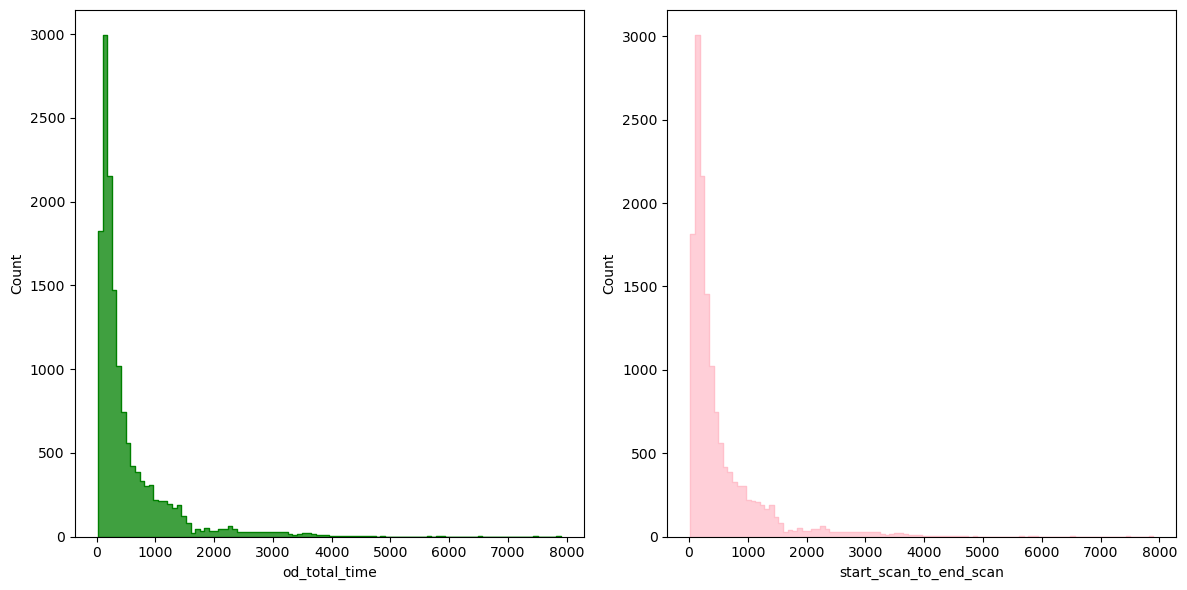

In [52]:
plot_dist ('od_total_time',  'start_scan_to_end_scan')

((array([-3.90622638, -3.68627647, -3.56575533, ...,  3.56575533,
        3.68627647,  3.90622638]), array([  23.46,   26.5 ,   26.58, ..., 6496.02, 7458.94, 7898.55])), (537.9246290768618, 530.3134679110028, 0.8168212377722497))
((array([-3.90622638, -3.68627647, -3.56575533, ...,  3.56575533,
        3.68627647,  3.90622638]), array([  23.,   26.,   26., ..., 6495., 7458., 7898.])), (537.6611256744281, 529.4290254953675, 0.8166201568117032))


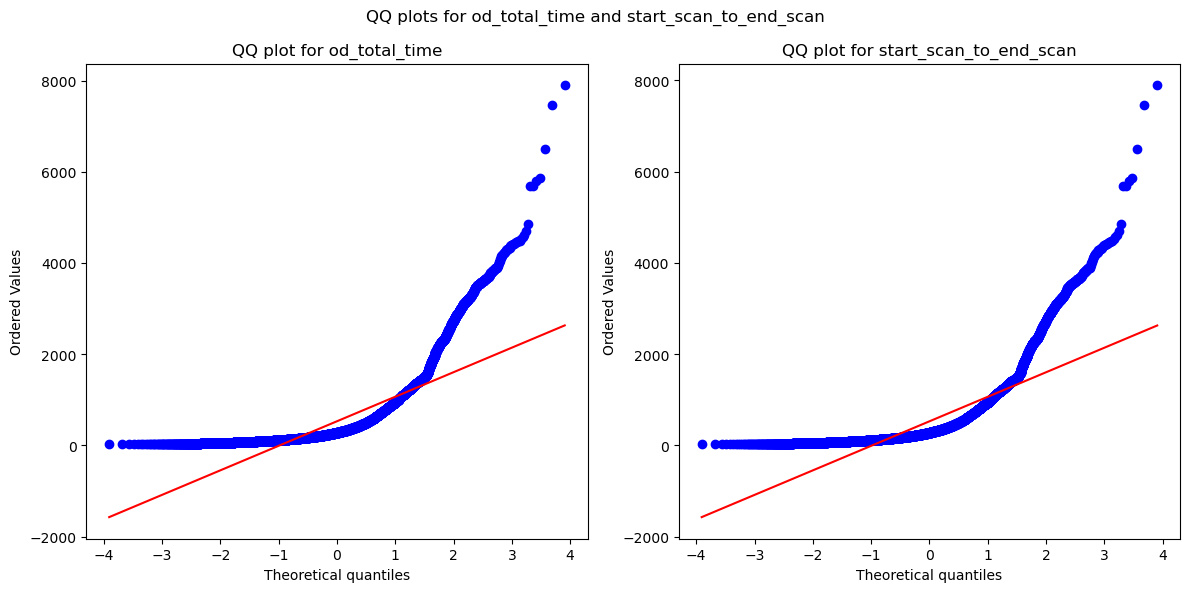

In [53]:
qq_plot('od_total_time',  'start_scan_to_end_scan')

In [54]:
levene_test('od_total_time',  'start_scan_to_end_scan')

p_value 0.9671810468715469


'The samples have Homogenous Variance'

In [55]:
shapiro_test ('od_total_time',  'start_scan_to_end_scan')

p_value 7.526206717878174e-19
p_value 7.264394651288022e-21


('The sample does not follow normal distribution',
 'The sample does not follow normal distribution')


### **Conclusion from the Above Analysis**

- **Histogram Plot**: Indicates that the data is **right-skewed**.
- **Q-Q Plot**: Deviations from the reference line suggest the data **does not follow a normal (Gaussian) distribution**.
- **Shapiro-Wilk Test**: The sample **does not follow a normal distribution** (p-value < 0.05).
- **Levene's Test**: The samples **do not have homogeneous variances** (p-value < 0.05).

###  Therefore:
Since the assumptions for an Independent Samples **T-Test** (normality and equal variances) are **not met**,  
**we cannot proceed with a parametric T-Test**. Instead, a **non-parametric alternative such as the Mann-Whitney U Test** should be used.

---


In [56]:
# boxcox transformation
def boxcox_test(col1, col2):
    """Applies Box-Cox transformation to normalize the specified column(s) in the dataset."""

    # Apply Box-Cox to both columns
    transformed1 = st.boxcox(df_aggid[col1])[0]
    transformed2 = st.boxcox(df_aggid[col2])[0]
    
    # Convert to DataFrames with column names
    transformed1 = pd.DataFrame(transformed1, columns=[f"{col1}_boxcox"])
    transformed2 = pd.DataFrame(transformed2, columns=[f"{col2}_boxcox"])
    
    # Combine side by side
    return pd.concat([transformed1, transformed2], axis=1)



In [57]:
box_val  = boxcox_test('od_total_time',  'start_scan_to_end_scan')
box_val.head()

,od_total_time_boxcox,start_scan_to_end_scan_boxcox
0,4.720819,4.748396
1,3.695012,3.706278
2,4.901784,4.932104
3,3.397090,3.407413
4,4.298992,4.320408


In [58]:
# Shapiro-Wilk test for normality

def shapiro_test_tt(col1, col2):
    sample1 = box_val[col1].sample(200)
    sample2 = box_val[col2].sample(200)

    #testing for col1
    t_stat, p_value = st.shapiro(sample1)
    if p_value < 0.05:
        rel1 = ('The sample does not follow normal distribution')
    else:
        rel1 = ('The sample follows normal distribution') 

    # tetsing for col2
    t_stat, p_value = st.shapiro(sample2)
    if p_value < 0.05:
        rel2 = ('The sample does not follow normal distribution')
    else:
        rel2 = ('The sample follows normal distribution')
    return (rel1, rel2)

In [59]:
shapiro_test_tt('od_total_time_boxcox',  'start_scan_to_end_scan_boxcox')

('The sample follows normal distribution',
 'The sample follows normal distribution')

In [60]:
test_stat, p_value = st.mannwhitneyu(df_aggid['od_total_time'], df_aggid['start_scan_to_end_scan'])
print('P-value :',p_value)
if p_value < 0.05:
    print('Samples are significantly different')
else:
    print('Samples are not significantly different') 

P-value : 0.780940379505003
Samples are not significantly different


---
Since the p-value is greater than the significance level (α), we fail to reject the null hypothesis. Therefore, it can be concluded that od_total_time and start_scan_to_end_scan are statistically similar.

---

# Hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value


### **Step 1: Set up the Hypotheses**

- **Null Hypothesis (H₀):**  
  The mean difference between the actual time (aggregated) and OSRM time (aggregated) is **not significantly different** (i.e., the means are equal).

- **Alternative Hypothesis (H₁):**  
  The mean difference between the actual time (aggregated) and OSRM time (aggregated) is **significantly different**.

---

### **Step 2: Check Assumptions for the Hypothesis Test**

1. **Normality Check**  
   - Use a **Q-Q Plot** to visually assess whether the differences follow a normal distribution.
   - Optionally confirm with a **Shapiro-Wilk Test**.

2. **Homogeneity of Variance**  
   - Use **Levene’s Test** to check if the variances between the two groups are equal.

---

### **Step 3: Choose the Appropriate Statistical Test**

- If the assumptions of normality and equal variances are met:
  - Perform an **Independent Samples T-Test**.
- If assumptions are **violated**:
  - Use the **Mann-Whitney U Test**, the non-parametric alternative to the T-Test for independent samples.

---

### **Step 4: Set the Significance Level (α)**

- Set **α = 0.05**

---

### **Step 5: Make a Decision Based on the p-value**

- If **p-value > α** → **Fail to reject H₀** (no significant difference)
- If **p-value < α** → **Reject H₀** (significant difference exists)

---


In [61]:
stats_desc('actual_time', 'osrm_time')

,count,mean,std,min,25%,50%,75%,max
actual_time,14787.0,356.306012,561.517936,9.0,67.0,148.0,367.0,6265.0
osrm_time,14787.0,160.990938,271.459495,6.0,29.0,60.0,168.0,2032.0


Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


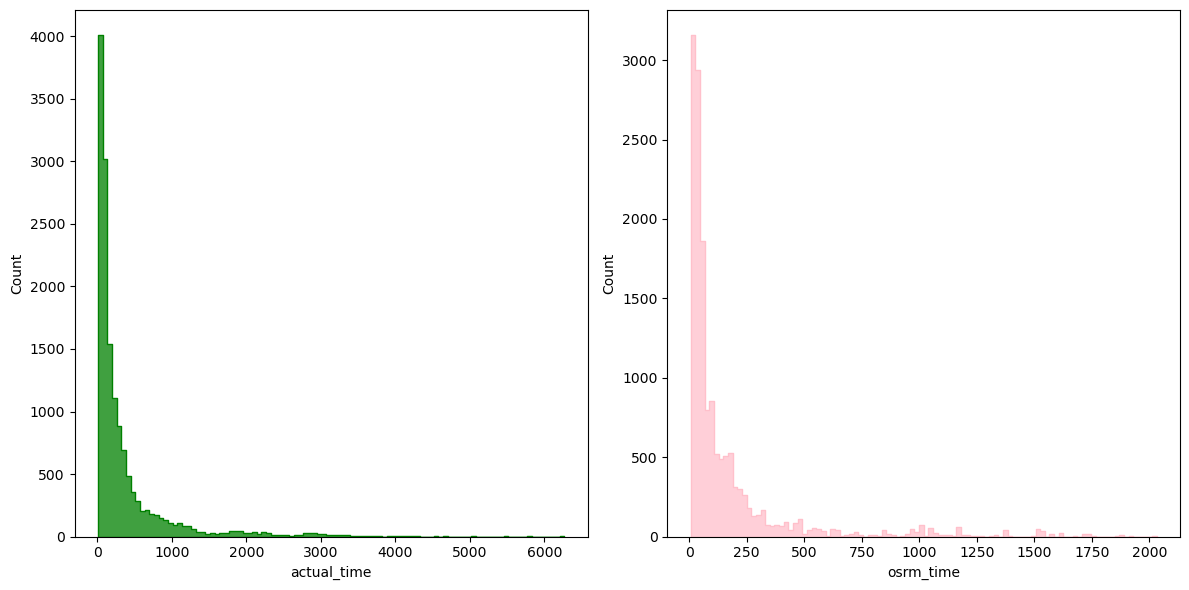

In [62]:
plot_dist('actual_time', 'osrm_time')

((array([-3.90622638, -3.68627647, -3.56575533, ...,  3.56575533,
        3.68627647,  3.90622638]), array([   9.,    9.,   10., ..., 5465., 5804., 6265.])), (427.79748769756117, 356.30601203760045, 0.761693377848543))
((array([-3.90622638, -3.68627647, -3.56575533, ...,  3.56575533,
        3.68627647,  3.90622638]), array([   6.,    7.,    7., ..., 2031., 2032., 2032.])), (200.5670444872438, 160.9909379860688, 0.7386864311178046))


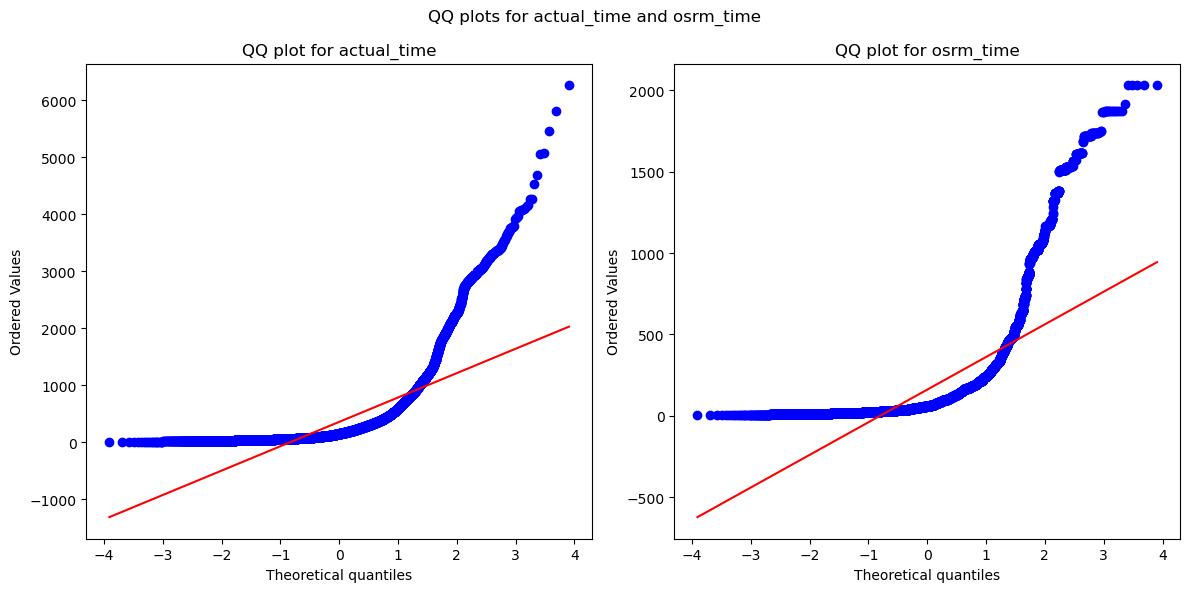

In [63]:
qq_plot('actual_time', 'osrm_time')

In [64]:
shapiro_test('actual_time', 'osrm_time')

p_value 2.421566794073483e-23
p_value 1.103883634613561e-21


('The sample does not follow normal distribution',
 'The sample does not follow normal distribution')

In [65]:
levene_test('actual_time', 'osrm_time')

p_value 8.743536461316657e-219


'The samples do not have  Homogenous Variance'


### **Conclusion from the Above Analysis**

- **Histogram Plot**: Indicates that the data is **right-skewed**.
- **Q-Q Plot**: Deviations from the reference line suggest the data **does not follow a normal (Gaussian) distribution**.
- **Shapiro-Wilk Test**: The sample **does not follow a normal distribution** (p-value < 0.05).
- **Levene's Test**: The samples **do not have homogeneous variances** (p-value < 0.05).

###  Therefore:
Since the assumptions for an Independent Samples **T-Test** (normality and equal variances) are **not met**,  
**we cannot proceed with a parametric T-Test**. Instead, a **non-parametric alternative such as the Mann-Whitney U Test** should be used.

---


In [66]:
# boxcox transformation
def boxcox_test(col1, col2):
    """Applies Box-Cox transformation to normalize the specified column(s) in the dataset."""

    # Apply Box-Cox to both columns
    transformed1 = st.boxcox(df_aggid[col1])[0]
    transformed2 = st.boxcox(df_aggid[col2])[0]
    
    # Convert to DataFrames with column names
    transformed1 = pd.DataFrame(transformed1, columns=[f"{col1}_boxcox"])
    transformed2 = pd.DataFrame(transformed2, columns=[f"{col2}_boxcox"])
    
    # Combine side by side
    return pd.concat([transformed1, transformed2], axis=1)



In [67]:
boxcox_values = boxcox_test('actual_time', 'osrm_time')
boxcox_values.head()

,actual_time_boxcox,osrm_time_boxcox
0,4.363873,3.520374
1,3.448421,2.774050
2,4.590560,3.716826
3,3.012351,2.052965
4,3.821448,2.980870


In [68]:
# Shapiro-Wilk test for normality

def shapiro_test1(col1, col2):
    sample1 = boxcox_values[col1].sample(200)
    sample2 = boxcox_values[col2].sample(200)

    #testing for col1
    t_stat, p_value = st.shapiro(sample1)
    if p_value < 0.05:
        rel1 = ('The sample does not follow normal distribution')
    else:
        rel1 = ('The sample follows normal distribution') 

    # tetsing for col2
    t_stat, p_value = st.shapiro(sample2)
    if p_value < 0.05:
        rel2 = ('The sample does not follow normal distribution')
    else:
        rel2 = ('The sample follows normal distribution')
    return (rel1, rel2)

In [69]:
shapiro_test1('actual_time_boxcox', 'osrm_time_boxcox')

('The sample follows normal distribution',
 'The sample does not follow normal distribution')


---

**Since the samples violate the assumptions required for a T-Test (normality and homogeneity of variances), it is not appropriate to use a parametric test in this case. Therefore, we proceed with the non-parametric alternative — the Mann-Whitney U Rank Test — for comparing two independent samples.**

---


In [70]:
t_stat, p_value = st.mannwhitneyu(df_aggid['actual_time'], df_aggid['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('Samples are significantly different')
else:
    print('Samples are not significantly different') 

p-value 0.0
Samples are significantly different


# Hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value 

---
### **Step 1: Set up the Hypotheses**

- **Null Hypothesis (H₀):**  
  The mean difference between the actual time (aggregated) and segment actual time (aggregated) is **not significantly different** (i.e., the means are equal).

- **Alternative Hypothesis (H₁):**  
  The mean difference between the actual time (aggregated) and segment actual time (aggregated) is **significantly different**.

---

### **Step 2: Check Assumptions for the Hypothesis Test**

1. **Normality Check**  
   - Use a **Q-Q Plot** to visually assess whether the differences follow a normal distribution.
   - Optionally confirm with a **Shapiro-Wilk Test**.

2. **Homogeneity of Variance**  
   - Use **Levene’s Test** to check if the variances between the two groups are equal.

---

### **Step 3: Choose the Appropriate Statistical Test**

- If the assumptions of normality and equal variances are met:
  - Perform an **Independent Samples T-Test**.
- If assumptions are **violated**:
  - Use the **Mann-Whitney U Test**, the non-parametric alternative to the T-Test for independent samples.

---

### **Step 4: Set the Significance Level (α)**

- Set **α = 0.05**

---

### **Step 5: Make a Decision Based on the p-value**

- If **p-value > α** → **Fail to reject H₀** (no significant difference)
- If **p-value < α** → **Reject H₀** (significant difference exists)

---


In [71]:
df_aggid[['trip_uuid','actual_time', 'segment_actual_time']].head()

,trip_uuid,actual_time,segment_actual_time
0,trip-153671041653548748,1562.0,1548.0
1,trip-153671042288605164,143.0,141.0
2,trip-153671043369099517,3347.0,3308.0
3,trip-153671046011330457,59.0,59.0
4,trip-153671052974046625,341.0,340.0


In [72]:
 stats_desc('actual_time', 'segment_actual_time')

,count,mean,std,min,25%,50%,75%,max
actual_time,14787.0,356.306012,561.517936,9.0,67.0,148.0,367.0,6265.0
segment_actual_time,14787.0,353.059174,556.365911,9.0,66.0,147.0,364.0,6230.0


Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


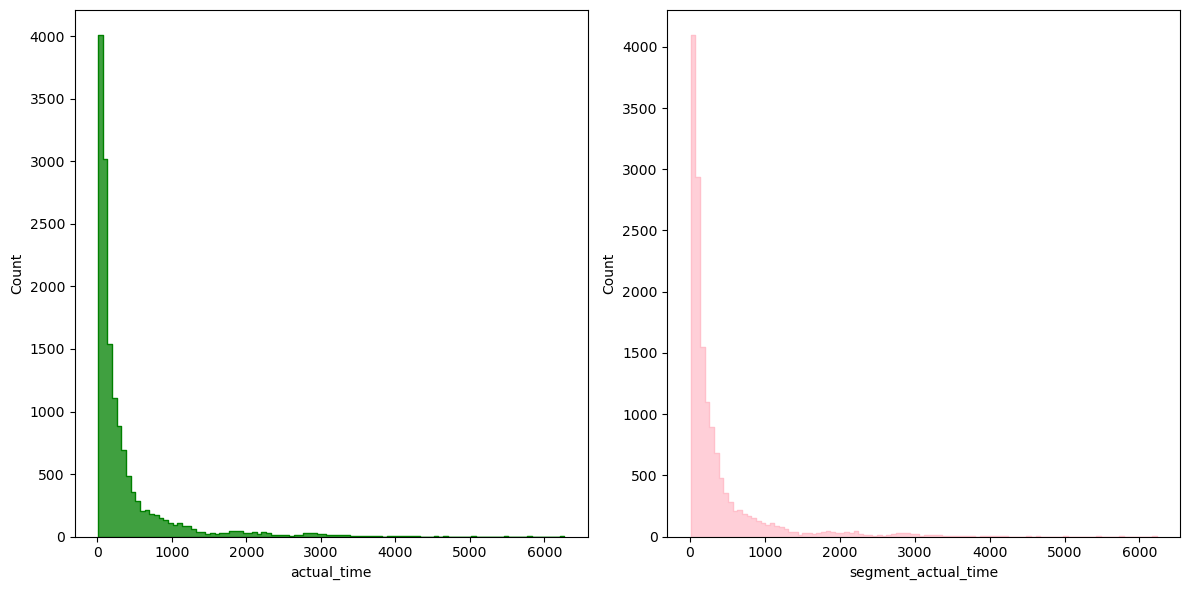

In [73]:
plot_dist('actual_time', 'segment_actual_time')

((array([-3.90622638, -3.68627647, -3.56575533, ...,  3.56575533,
        3.68627647,  3.90622638]), array([   9.,    9.,   10., ..., 5465., 5804., 6265.])), (427.79748769756117, 356.30601203760045, 0.761693377848543))
((array([-3.90622638, -3.68627647, -3.56575533, ...,  3.56575533,
        3.68627647,  3.90622638]), array([   9.,    9.,   10., ..., 5427., 5768., 6230.])), (424.0536025033646, 353.05917359843096, 0.7620190480749739))


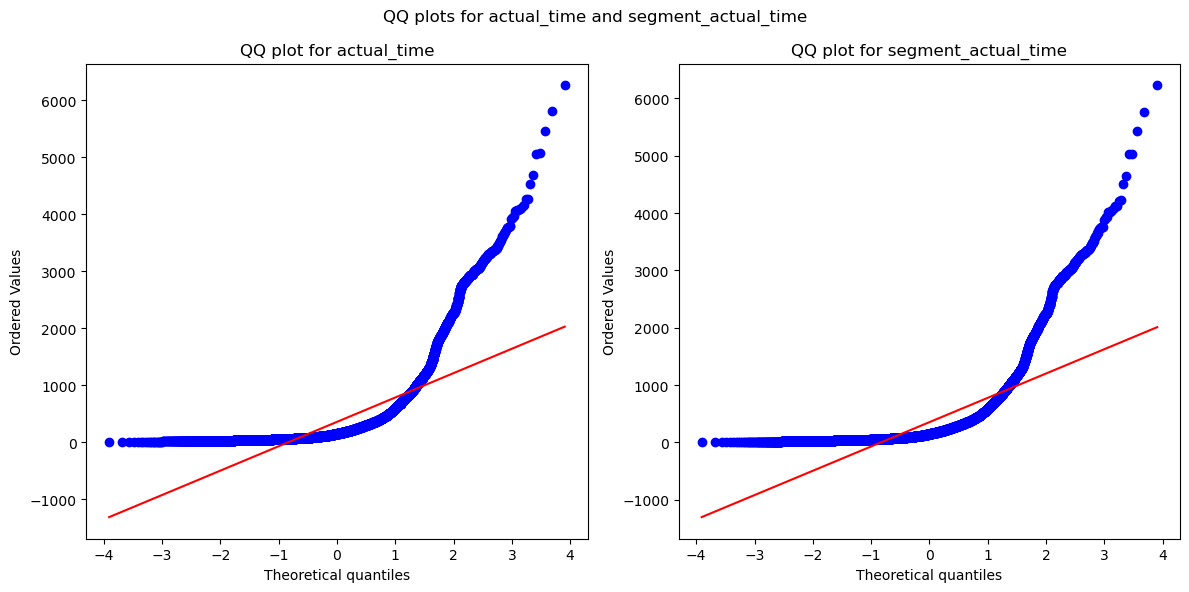

In [74]:
qq_plot('actual_time', 'segment_actual_time')

In [75]:
levene_test('actual_time', 'segment_actual_time')

p_value 0.6962681452003544


'The samples have Homogenous Variance'

In [76]:
shapiro_test('actual_time', 'segment_actual_time')

p_value 8.455841694919821e-23
p_value 3.500939756744471e-21


('The sample does not follow normal distribution',
 'The sample does not follow normal distribution')


---

### **Conclusion from the Above Analysis**

- **Histogram Plot**: Indicates that the data is **right-skewed**.
- **Q-Q Plot**: Deviations from the reference line suggest the data **does not follow a normal (Gaussian) distribution**.
- **Shapiro-Wilk Test**: The sample **does not follow a normal distribution** (p-value < 0.05).
- **Levene's Test**: The samples **do not have homogeneous variances** (p-value < 0.05).

### Therefore:
Since the assumptions for an Independent Samples **T-Test** (normality and equal variances) are **not met**,  
**we cannot proceed with a parametric T-Test**. Instead, a **non-parametric alternative such as the Mann-Whitney U Test** should be used.

---



In [77]:
boxcox_values2 = boxcox_test('actual_time', 'segment_actual_time')
boxcox_values2.head()

,actual_time_boxcox,segment_actual_time_boxcox
0,4.363873,4.358946
1,3.448421,3.440757
2,4.590560,4.584911
3,3.012351,3.011471
4,3.821448,3.818755


In [78]:
# Shapiro-Wilk test for normality

def shapiro_test2(col1, col2):
    
    '''Performs the Shapiro-Wilk test for normality on a sample of the specified columns in the dataset. '''
    
    sample1 = boxcox_values2[col1].sample(200)
    sample2 = boxcox_values2[col2].sample(200)

    #testing for col1
    t_stat, p_value = st.shapiro(sample1)
    print('p_value', p_value)
    if p_value < 0.05:
        rel1 = ('The sample does not follow normal distribution')
    else:
        rel1 = ('The sample follows normal distribution') 

    # tetsing for col2
    t_stat, p_value = st.shapiro(sample2)
    print('p_value', p_value)
    if p_value < 0.05:
        rel2 = ('The sample does not follow normal distribution')
    else:
        rel2 = ('The sample follows normal distribution')
    return (rel1, rel2)

In [79]:
shapiro_test2('actual_time_boxcox','segment_actual_time_boxcox')

p_value 0.1375802755355835
p_value 0.10669463127851486


('The sample follows normal distribution',
 'The sample follows normal distribution')

---
### **Conclusion from the Above Analysis**

- **Histogram Plot**: Indicates that the data is **right-skewed**.
- **Q-Q Plot**: Deviations from the reference line suggest the data **does not follow a normal (Gaussian) distribution**.
- **Shapiro-Wilk Test**: The sample **does not follow a normal distribution** (p-value < 0.05).
- **Levene's Test**: The samples **do not have homogeneous variances** (p-value < 0.05).

### Therefore:
Since the assumptions for an Independent Samples **T-Test** (normality and equal variances) are **not met**,  
**we cannot proceed with a parametric T-Test**. Instead, a **non-parametric alternative such as the Mann-Whitney U Test** should be used.

---



In [80]:
t_stat, p_value = st.mannwhitneyu(df_aggid['actual_time'], df_aggid['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ') 

p-value 0.41578601931625214
The samples are similar 


---

**Since the p-value is less than the significance level (α = 0.05), we reject the null hypothesis. Therefore, it can be concluded that `actual_time` and `segment actual time` are not statistically similar. This suggests a significant difference in the distributions of these two variables, indicating potential discrepancies between the total OSRM distance and the sum of segment-level OSRM distances.**

---


# Hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value 

---


### **Step 1: Set up the Hypotheses**

- **Null Hypothesis (H₀):**  
  The mean difference between the osrm distance (aggregated) and segment osrm distance (aggregated) is **not significantly different** (i.e., the means are equal).

- **Alternative Hypothesis (H₁):**  
  The mean difference between the osrm distance (aggregated) and segment osrm distance (aggregated) is **significantly different**.

---

### **Step 2: Check Assumptions for the Hypothesis Test**

1. **Normality Check**  
   - Use a **Q-Q Plot** to visually assess whether the differences follow a normal distribution.
   - Optionally confirm with a **Shapiro-Wilk Test**.

2. **Homogeneity of Variance**  
   - Use **Levene’s Test** to check if the variances between the two groups are equal.

---

### **Step 3: Choose the Appropriate Statistical Test**

- If the assumptions of normality and equal variances are met:
  - Perform an **Independent Samples T-Test**.
- If assumptions are **violated**:
  - Use the **Mann-Whitney U Test**, the non-parametric alternative to the T-Test for independent samples.

---

### **Step 4: Set the Significance Level (α)**

- Set **α = 0.05**

---

### **Step 5: Make a Decision Based on the p-value**

- If **p-value > α** → **Fail to reject H₀** (no significant difference)
- If **p-value < α** → **Reject H₀** (significant difference exists)

---

In [81]:
# ('osrm_distance', 'segment_osrm_distance')
df_aggid[['osrm_distance', 'segment_osrm_distance']].head()

,osrm_distance,segment_osrm_distance
0,991.3523,1320.4733
1,85.1110,84.1894
2,2354.0665,2545.2678
3,19.6800,19.8766
4,146.7918,146.7919


In [82]:
stats_desc('osrm_distance', 'segment_osrm_distance')

,count,mean,std,min,25%,50%,75%,max
osrm_distance,14787.0,203.887411,370.565564,9.0729,30.75690,65.3028,206.6442,2840.0810
segment_osrm_distance,14787.0,222.705466,416.846279,9.0729,32.57885,69.7842,216.5606,3523.6324


Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


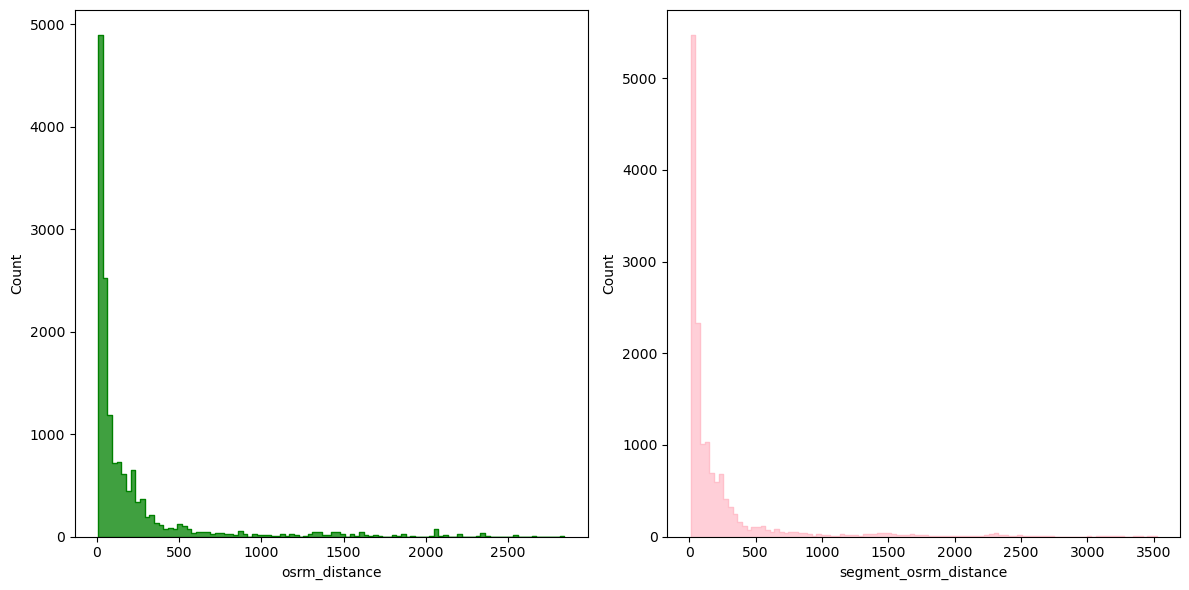

In [83]:
plot_dist('osrm_distance', 'segment_osrm_distance')

((array([-3.90622638, -3.68627647, -3.56575533, ...,  3.56575533,
        3.68627647,  3.90622638]), array([   9.0729,    9.1364,    9.2903, ..., 2839.3582, 2839.6603,
       2840.081 ])), (267.6806180557242, 203.88741124636493, 0.7221999437884683))
((array([-3.90622638, -3.68627647, -3.56575533, ...,  3.56575533,
        3.68627647,  3.90622638]), array([   9.0729,    9.1364,    9.2903, ..., 3456.0357, 3489.9866,
       3523.6324])), (296.8831021430198, 222.70546644349756, 0.7120576112855832))


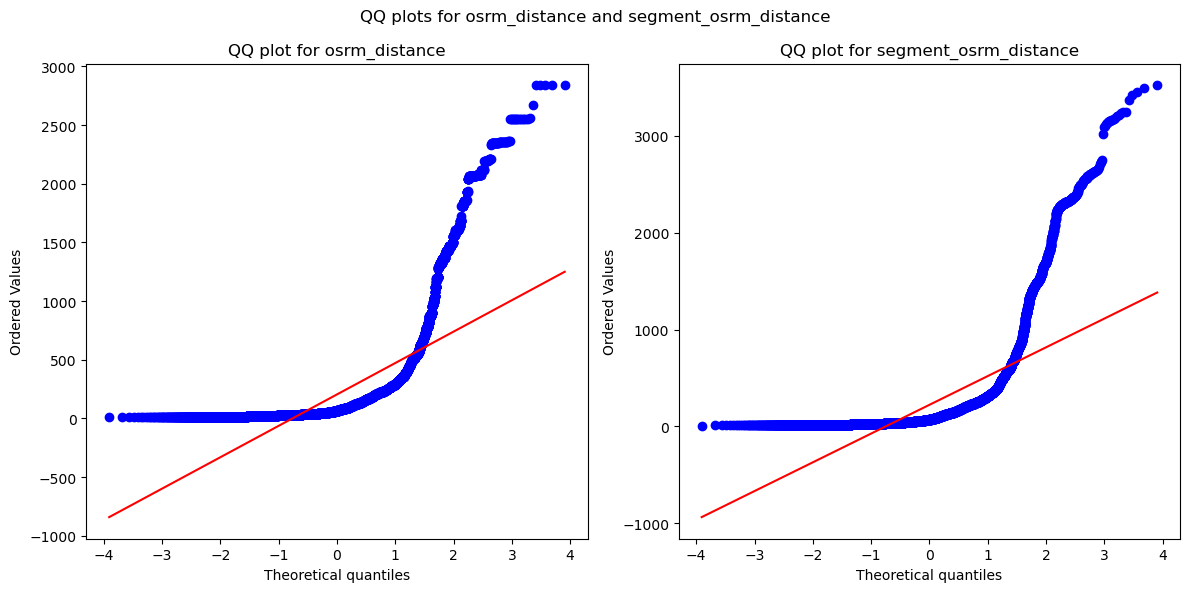

In [84]:
qq_plot('osrm_distance', 'segment_osrm_distance')

In [85]:
shapiro_test('osrm_distance', 'segment_osrm_distance')

p_value 7.153291292070077e-24
p_value 9.035737448424494e-24


('The sample does not follow normal distribution',
 'The sample does not follow normal distribution')

In [86]:
boxcox_values3 = boxcox_test('osrm_distance', 'segment_osrm_distance')
boxcox_values3.head()

,osrm_distance_boxcox,segment_osrm_distance_boxcox
0,3.469969,3.658440
1,2.790050,2.857677
2,3.631950,3.788956
3,2.160524,2.205227
4,2.975521,3.059653


In [87]:
# Shapiro-Wilk test for normality

def shapiro_test3(col1, col2):
    sample1 = boxcox_values3[col1].sample(200)
    sample2 = boxcox_values3[col2].sample(200)

    #testing for col1
    t_stat, p_value = st.shapiro(sample1)
    print('p_value', p_value)
    if p_value < 0.05:
        rel1 = ('The sample does not follow normal distribution')
    else:
        rel1 = ('The sample follows normal distribution') 

    # tetsing for col2
    t_stat, p_value = st.shapiro(sample2)
    print('p_value', p_value)
    if p_value < 0.05:
        rel2 = ('The sample does not follow normal distribution')
    else:
        rel2 = ('The sample follows normal distribution')
    return (rel1, rel2)

In [88]:
shapiro_test3('osrm_distance_boxcox','segment_osrm_distance_boxcox')

p_value 0.003435838967561722
p_value 0.000632871116977185


('The sample does not follow normal distribution',
 'The sample does not follow normal distribution')

In [89]:
levene_test('osrm_distance', 'segment_osrm_distance')

p_value 0.00022171213513990103


'The samples do not have  Homogenous Variance'

---

### **Conclusion from the Above Analysis**

- **Histogram Plot**: Indicates that the data is **right-skewed**.
- **Q-Q Plot**: Deviations from the reference line suggest the data **does not follow a normal (Gaussian) distribution**.
- **Shapiro-Wilk Test**: The sample **does not follow a normal distribution** (p-value < 0.05).
- **Levene's Test**: The samples **do not have homogeneous variances** (p-value < 0.05).

### Therefore:
Since the assumptions for an Independent Samples **T-Test** (normality and equal variances) are **not met**,  
**we cannot proceed with a parametric T-Test**. Instead, a **non-parametric alternative such as the Mann-Whitney U Test** should be used.

---

In [90]:
t_stat, p_value = st.mannwhitneyu(df_aggid['osrm_distance'], df_aggid['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 1.0001087659092072e-06
The samples are not similar



---

**Since the p-value is less than the significance level (α), we reject the null hypothesis. Therefore, it can be concluded that `osrm_distance` and `segment_osrm_distance` are not statistically similar.**

---


# Hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value 

---


### **Step 1: Set up the Hypotheses**

- **Null Hypothesis (H₀):**  
  The mean difference between the  osrm time (aggregated) and segment osrm time (aggregated) is **not significantly different** (i.e., the means are equal).

- **Alternative Hypothesis (H₁):**  
  The mean difference between the  osrm time (aggregated) and segment osrm time (aggregated) is **significantly different**.

---

### **Step 2: Check Assumptions for the Hypothesis Test**

1. **Normality Check**  
   - Use a **Q-Q Plot** to visually assess whether the differences follow a normal distribution.
   - Optionally confirm with a **Shapiro-Wilk Test**.

2. **Homogeneity of Variance**  
   - Use **Levene’s Test** to check if the variances between the two groups are equal.

---

### **Step 3: Choose the Appropriate Statistical Test**

- If the assumptions of normality and equal variances are met:
  - Perform an **Independent Samples T-Test**.
- If assumptions are **violated**:
  - Use the **Mann-Whitney U Test**, the non-parametric alternative to the T-Test for independent samples.

---

### **Step 4: Set the Significance Level (α)**

- Set **α = 0.05**

---

### **Step 5: Make a Decision Based on the p-value**

- If **p-value > α** → **Fail to reject H₀** (no significant difference)
- If **p-value < α** → **Reject H₀** (significant difference exists)

---

In [91]:
#  ('osrm_time', 'segment_osrm_time')
df_aggid[['osrm_time', 'segment_osrm_time']].head()

,osrm_time,segment_osrm_time
0,717.0,1008.0
1,68.0,65.0
2,1740.0,1941.0
3,15.0,16.0
4,117.0,115.0


In [92]:
stats_desc('osrm_time', 'segment_osrm_time')

,count,mean,std,min,25%,50%,75%,max
osrm_time,14787.0,160.990938,271.459495,6.0,29.0,60.0,168.0,2032.0
segment_osrm_time,14787.0,180.511598,314.679279,6.0,30.0,65.0,184.0,2564.0


Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


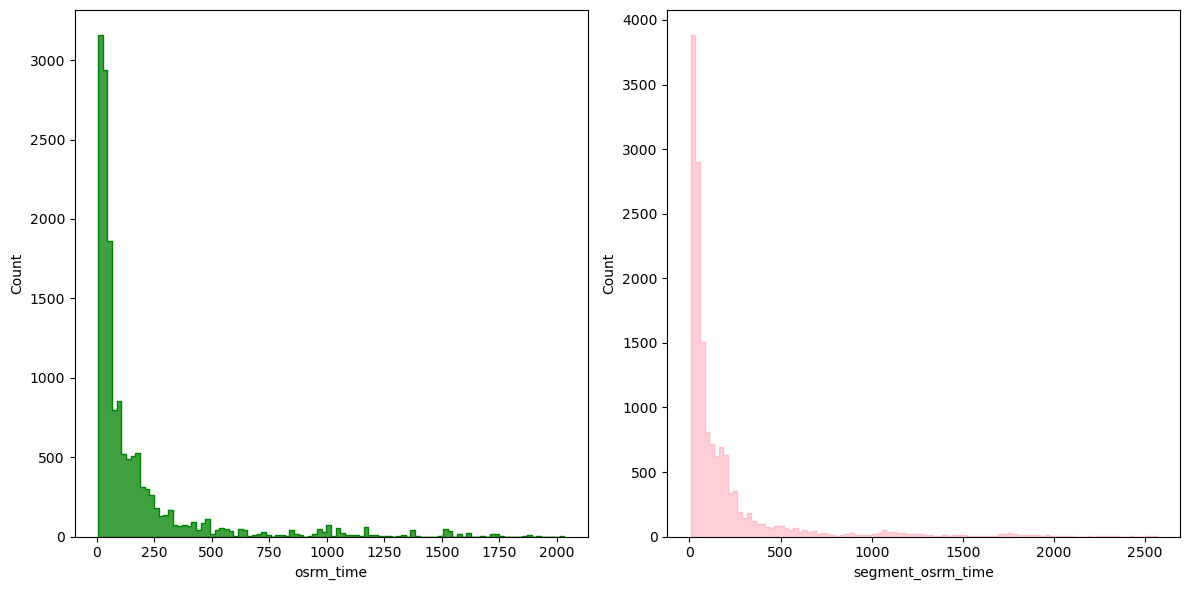

In [93]:
plot_dist('osrm_time', 'segment_osrm_time')

((array([-3.90622638, -3.68627647, -3.56575533, ...,  3.56575533,
        3.68627647,  3.90622638]), array([   6.,    7.,    7., ..., 2031., 2032., 2032.])), (200.5670444872438, 160.9909379860688, 0.7386864311178046))
((array([-3.90622638, -3.68627647, -3.56575533, ...,  3.56575533,
        3.68627647,  3.90622638]), array([   6.,    7.,    7., ..., 2510., 2530., 2564.])), (229.50023920260057, 180.51159802529244, 0.7291562091105451))


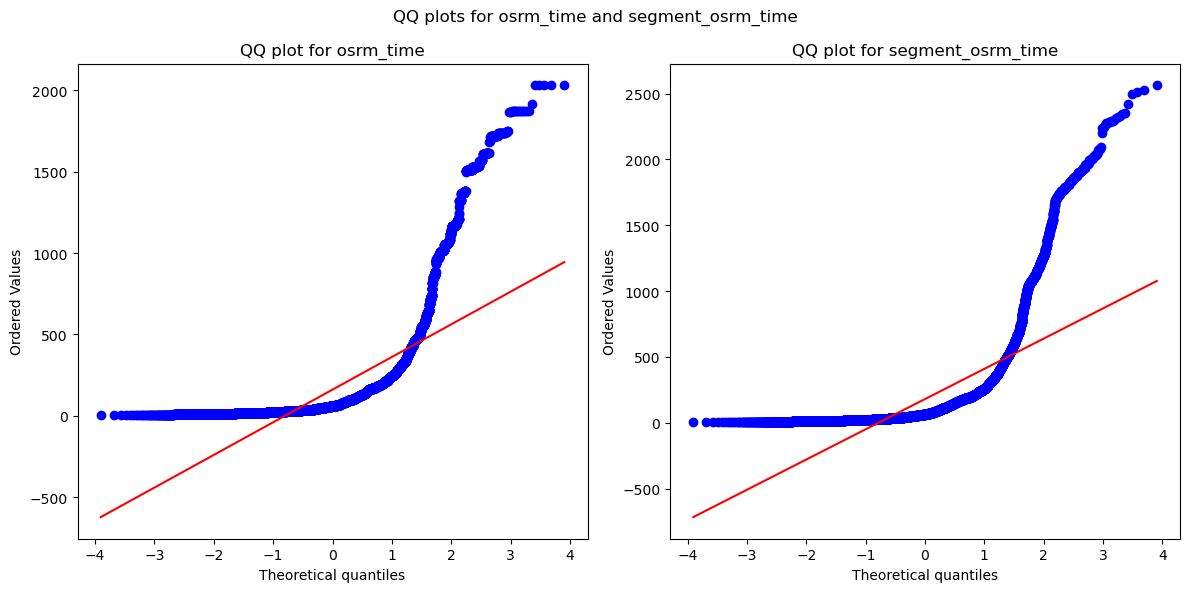

In [94]:
qq_plot('osrm_time', 'segment_osrm_time')

In [95]:
levene_test('osrm_time', 'segment_osrm_time')

p_value 9.250556006347759e-08


'The samples do not have  Homogenous Variance'

In [96]:
shapiro_test('osrm_time', 'segment_osrm_time')

p_value 6.80854895433023e-19
p_value 2.0233315075449152e-23


('The sample does not follow normal distribution',
 'The sample does not follow normal distribution')

In [97]:
boxcox_values4 = boxcox_test('osrm_time', 'segment_osrm_time')
boxcox_values4.head()

,osrm_time_boxcox,segment_osrm_time_boxcox
0,3.520374,3.812051
1,2.774050,2.863631
2,3.716826,3.973453
3,2.052965,2.145702
4,2.980870,3.104451


In [98]:
# Shapiro-Wilk test for normality

def shapiro_test4(col1, col2):
    sample1 = boxcox_values4[col1].sample(200)
    sample2 = boxcox_values4[col2].sample(200)

    #testing for col1
    t_stat, p_value = st.shapiro(sample1)
    print('p_value', p_value)
    if p_value < 0.05:
        rel1 = ('The sample does not follow normal distribution')
    else:
        rel1 = ('The sample follows normal distribution') 

    # tetsing for col2
    t_stat, p_value = st.shapiro(sample2)
    print('p_value', p_value)
    if p_value < 0.05:
        rel2 = ('The sample does not follow normal distribution')
    else:
        rel2 = ('The sample follows normal distribution')
    return (rel1, rel2)

In [99]:
shapiro_test4('osrm_time_boxcox','segment_osrm_time_boxcox')

p_value 0.04088500514626503
p_value 0.05447032302618027


('The sample does not follow normal distribution',
 'The sample follows normal distribution')

In [100]:
t_stat, p_value = st.mannwhitneyu(df_aggid['osrm_distance'], df_aggid['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 1.0001087659092072e-06
The samples are not similar



---

**Since the p-value is less than the significance level (α), we reject the null hypothesis. Therefore, it can be concluded that `osrm_time` and `segment_osrm_time` are not statistically similar.**

---


# Outliers on the numerical variables 

In [101]:
num_cols = df_aggid[['start_scan_to_end_scan', 'actual_distance_to_destination',
          'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
           'segment_osrm_time', 'segment_osrm_distance']]

In [102]:
num_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,14787.0,529.429025,658.254936,23.000000,149.000000,279.000000,632.000000,7898.000000
actual_distance_to_destination,14787.0,164.090196,305.502982,9.002461,22.777099,48.287894,163.591258,2186.531787
actual_time,14787.0,356.306012,561.517936,9.000000,67.000000,148.000000,367.000000,6265.000000
osrm_time,14787.0,160.990938,271.459495,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14787.0,203.887411,370.565564,9.072900,30.756900,65.302800,206.644200,2840.081000
segment_actual_time,14787.0,353.059174,556.365911,9.000000,66.000000,147.000000,364.000000,6230.000000
segment_osrm_time,14787.0,180.511598,314.679279,6.000000,30.000000,65.000000,184.000000,2564.000000
segment_osrm_distance,14787.0,222.705466,416.846279,9.072900,32.578850,69.784200,216.560600,3523.632400


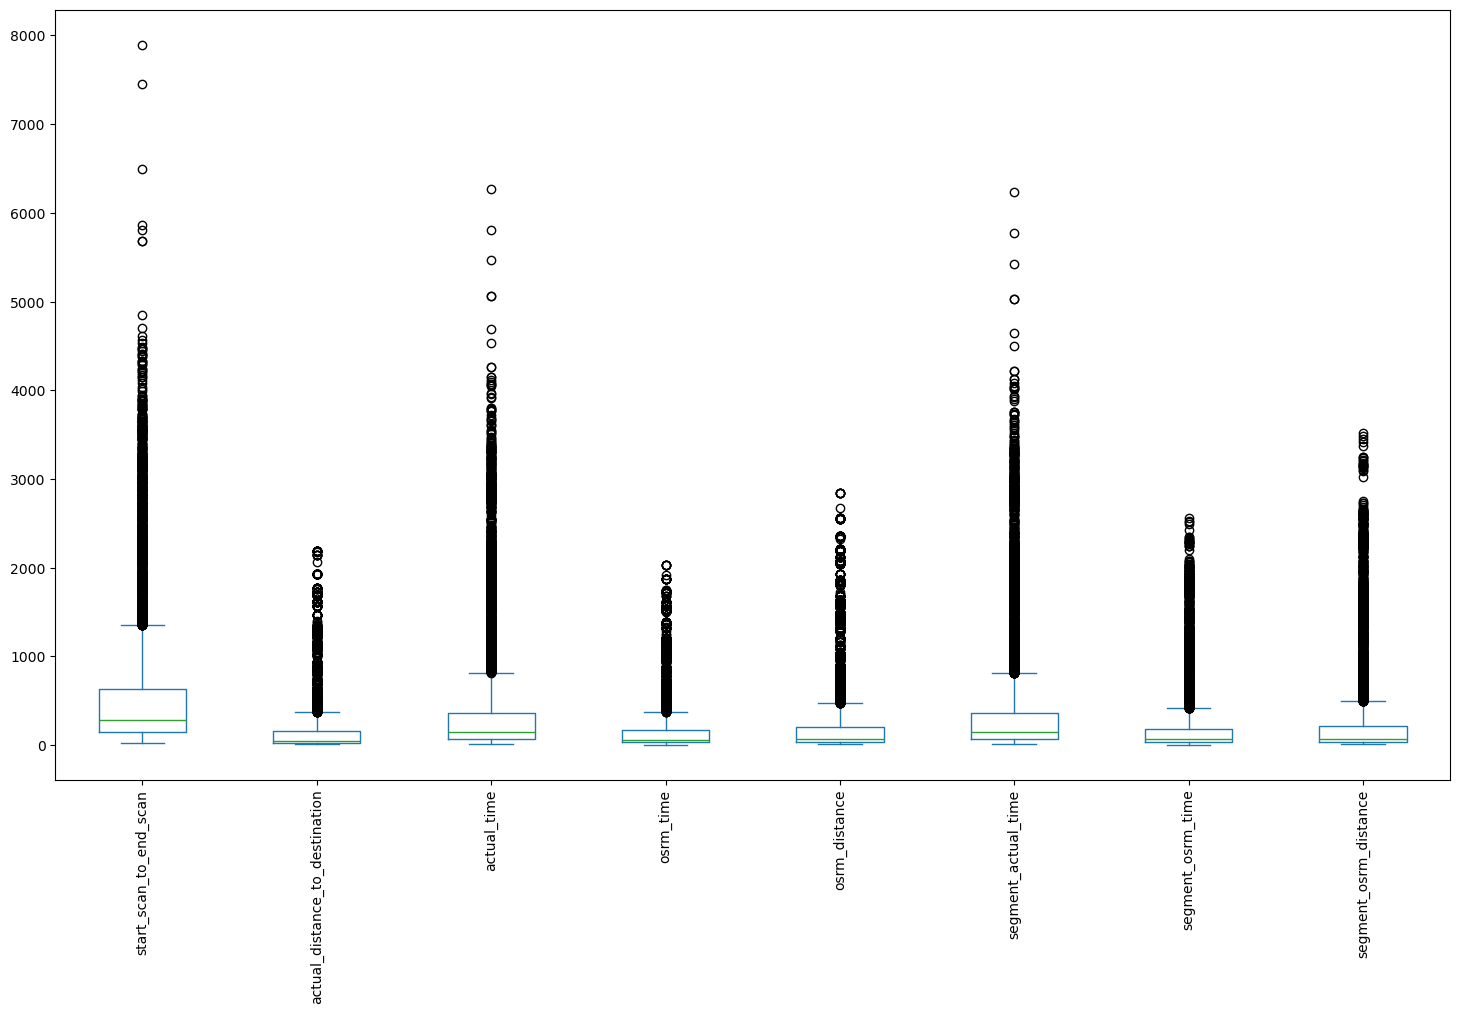

In [103]:
num_cols.plot(kind='box', figsize=(18,10))
plt.xticks(rotation=90)
plt.show()

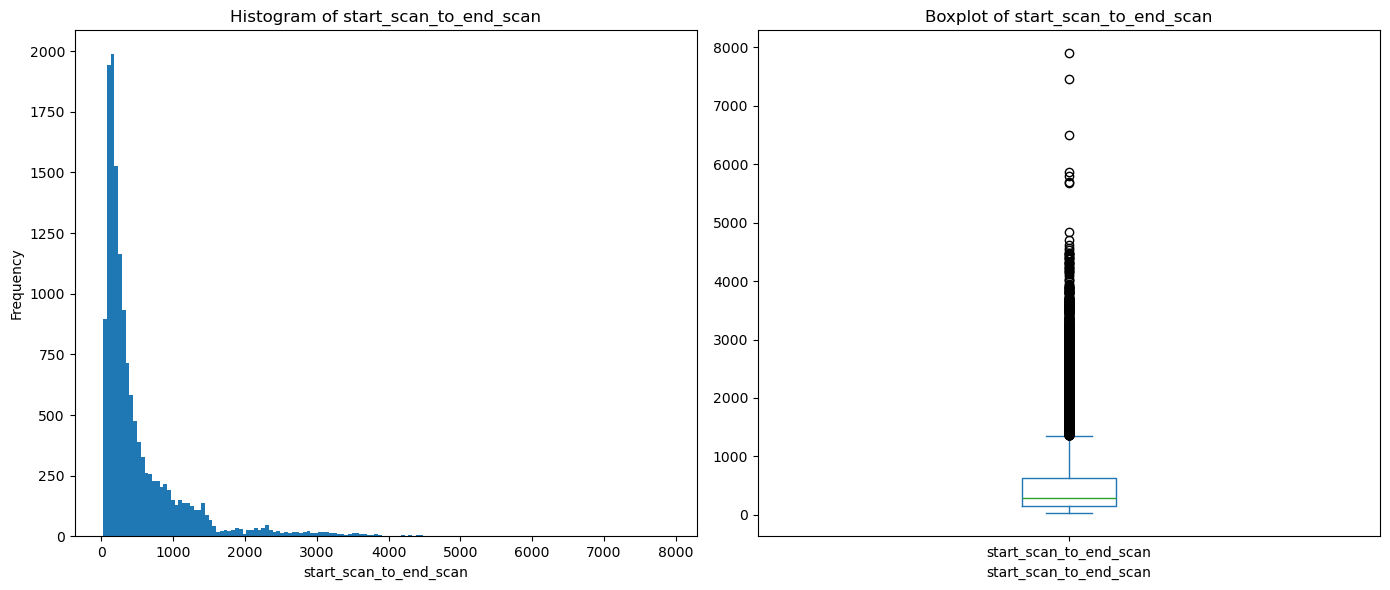

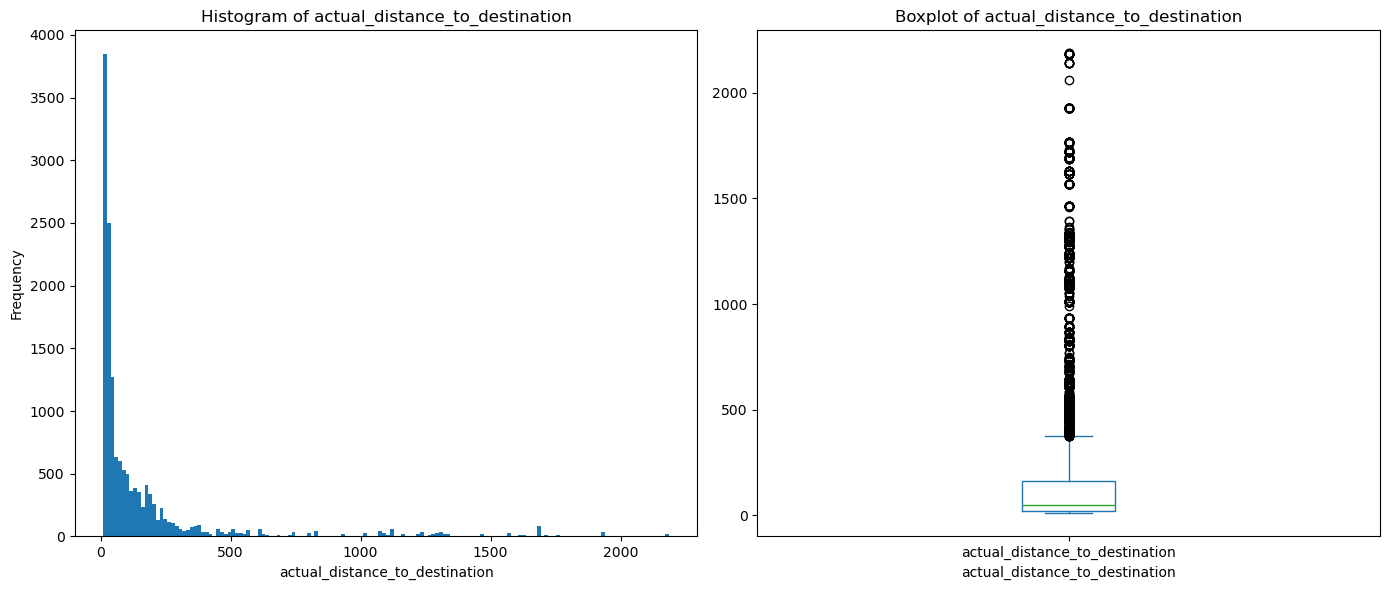

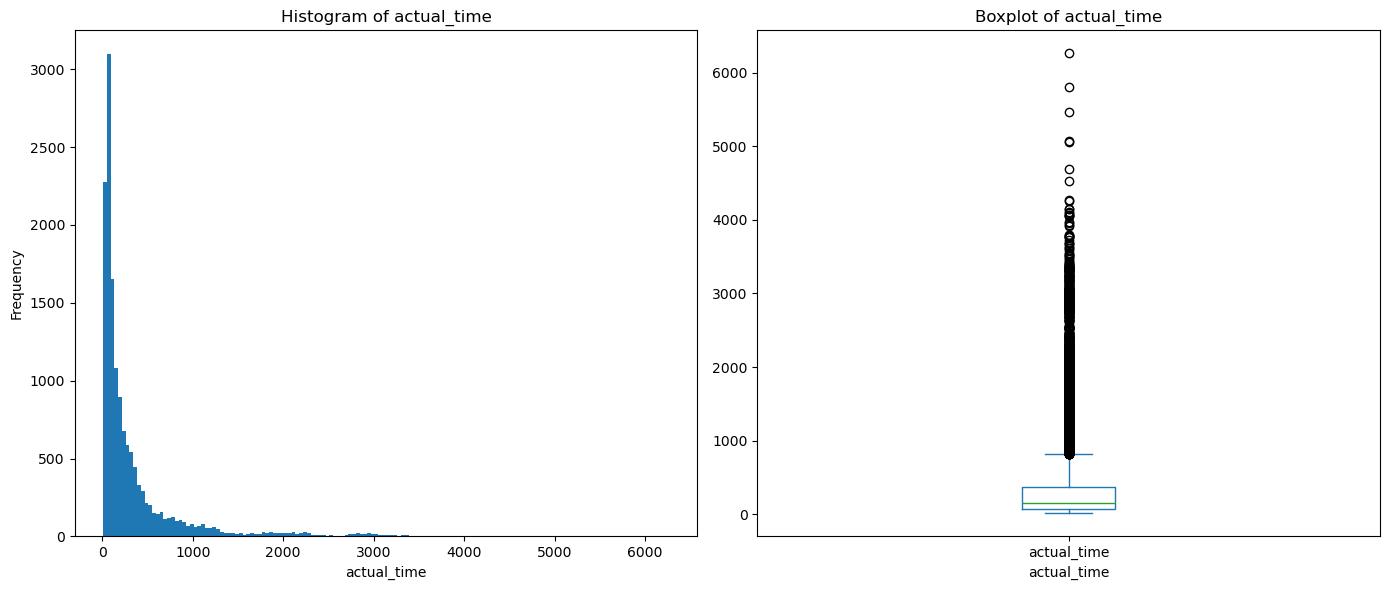

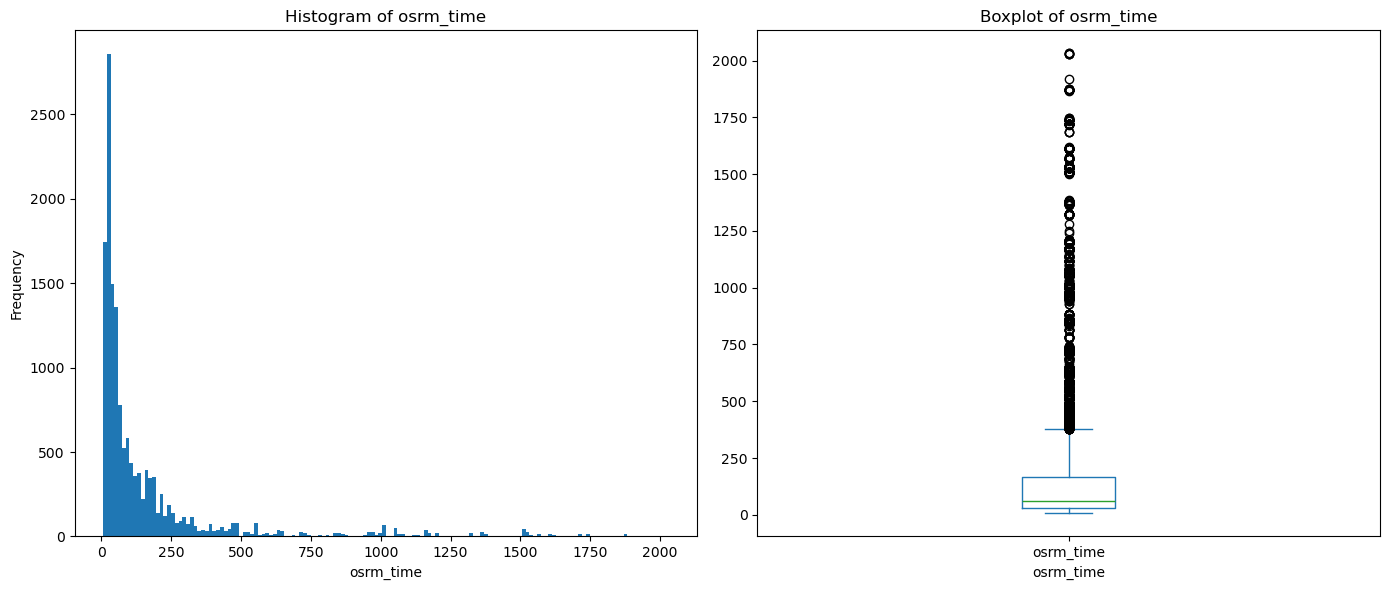

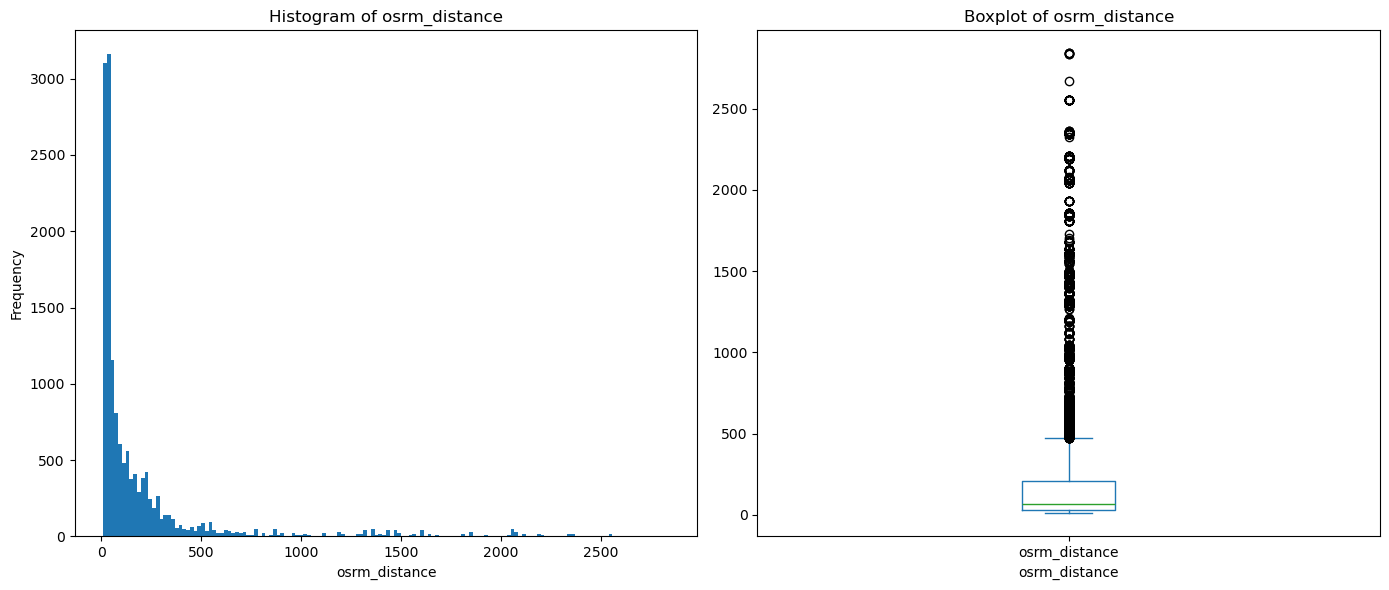

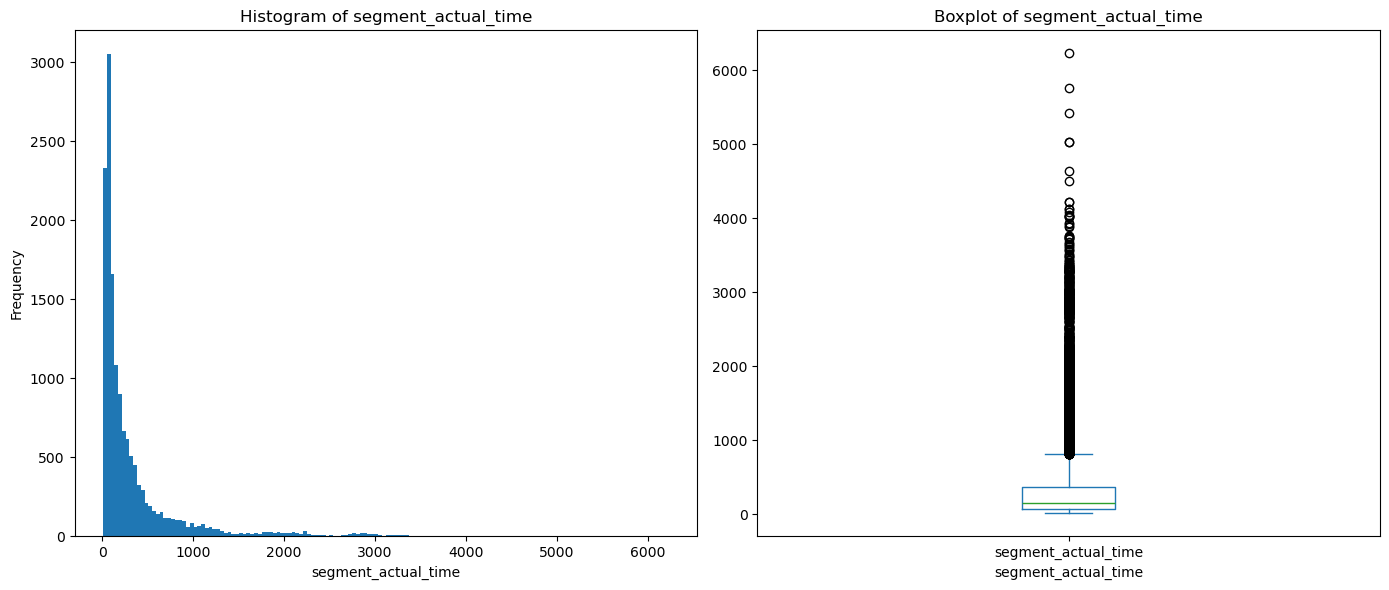

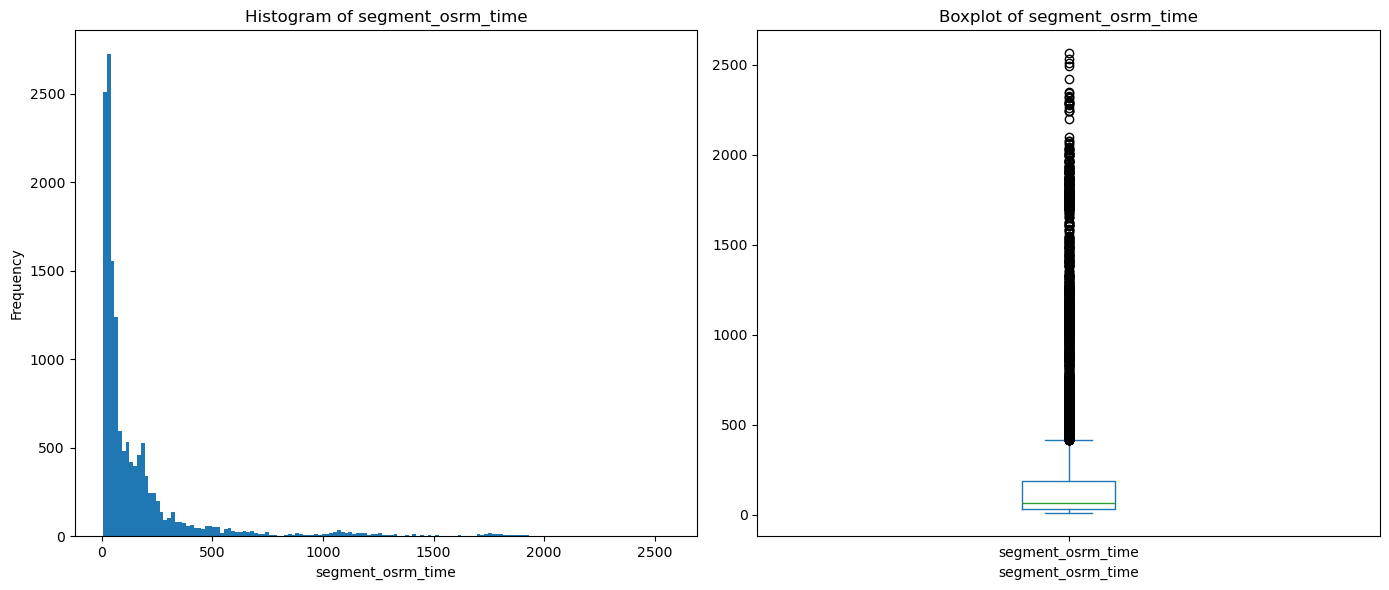

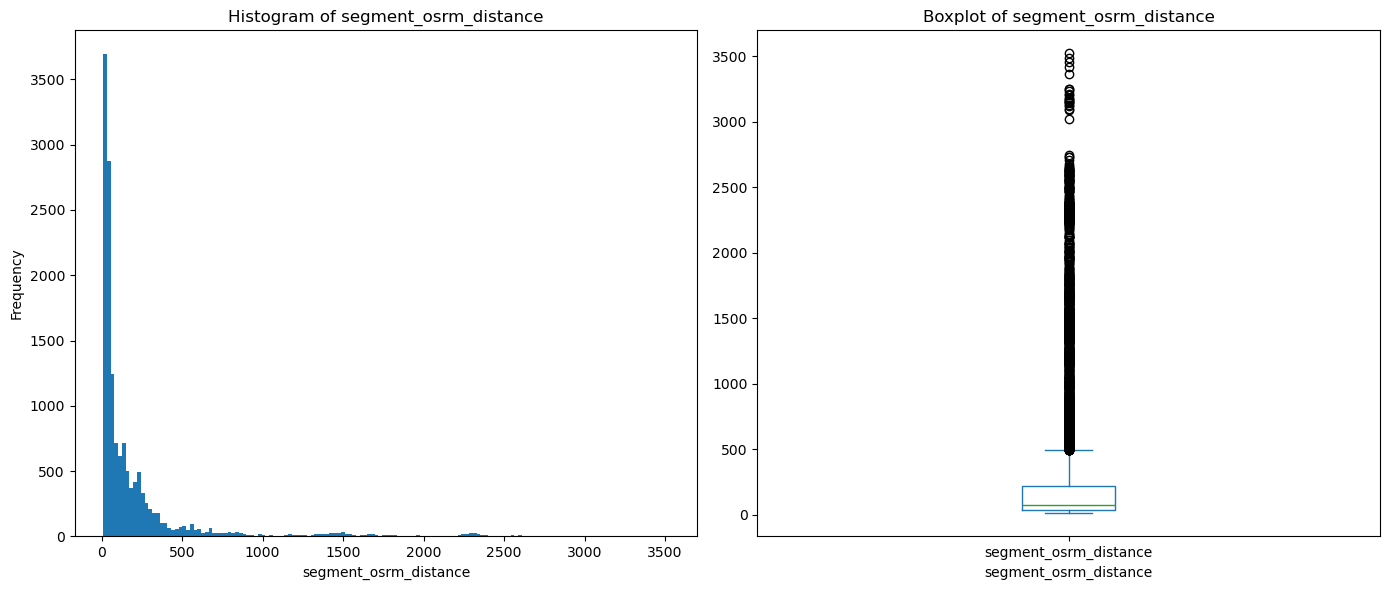

In [104]:
# IQR Method
for i, col in enumerate(num_cols):
    plt.figure(figsize=(14, 6))  # Slightly wider for two subplots

    # Plot 1: Histogram
    plt.subplot(1, 2, 1)
    df_aggid[col].plot(kind='hist', bins=150, title=f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Plot 2: 
    plt.subplot(1, 2, 2)
    df_aggid[col].plot(kind='box', title=f'Boxplot of {col}')  
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


In [105]:
# start_scan_to_end_scan

for i in num_cols:
    print(f'Outliers of {i}:')
    # print()
    percentile25 = np.quantile(df_aggid[i], 0.25)
    percentile75 = np.quantile(df_aggid[i], 0.75)
    iqr = percentile75 - percentile25
    upper_bond = percentile75 + iqr*1.5
    lower_bond = percentile25 - iqr*1.5
    outliers = df_aggid.loc[(df_aggid[i] > upper_bond) | (df_aggid[i] < lower_bond)]
    print(f'Number of outliers : {outliers.shape[0]}')
    print('percentile 25 is: ', percentile25,'\nPercentile 75 is: ', percentile75, 
          '\nIQR is: ', iqr, '\nUpper bond is: ', upper_bond, '\nLower Bond is: ', lower_bond)
    print('_ _'*30)

Outliers of start_scan_to_end_scan:
Number of outliers : 1282
percentile 25 is:  149.0 
Percentile 75 is:  632.0 
IQR is:  483.0 
Upper bond is:  1356.5 
Lower Bond is:  -575.5
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Outliers of actual_distance_to_destination:
Number of outliers : 1452
percentile 25 is:  22.777098943155323 
Percentile 75 is:  163.5912581579725 
IQR is:  140.81415921481718 
Upper bond is:  374.81249698019826 
Lower Bond is:  -188.44413987907043
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Outliers of actual_time:
Number of outliers : 1646
percentile 25 is:  67.0 
Percentile 75 is:  367.0 
IQR is:  300.0 
Upper bond is:  817.0 
Lower Bond is:  -383.0
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Outliers of osrm_time:
Number of outliers : 1506
percentile 25 is:  29.0 
Percentile 75 is:  168.0 
IQR is:  139.0 
Upper bond is:  376.5 


---

###  **Exploratory Outliers Analysis Summary**

- **Outliers** are present in **all columns** of the dataset.
- The **highest concentration of outliers** is observed in the `actual_time` and `segment_actual_time` columns.
- The **least number of outliers** are found in the `start_scan_to_end_scan` column.
- Based on visualizations (e.g., histograms and boxplots), **all columns exhibit right-skewed distributions**.
- Given the skewness and the presence of extreme values, applying the **IQR (Interquartile Range) method** is an appropriate approach for handling outliers.

---


# One-hot encoding of categorical variables 

In [106]:
df_aggid['route_type'].value_counts()

route_type
Carting    8906
FTL        5881
Name: count, dtype: int64

In [107]:
df_aggid[['Carting_encoded', 'FTL_encoded']] = pd.get_dummies(df_aggid['route_type']).astype(int)
df_aggid[['Carting_encoded', 'FTL_encoded']].head()

,Carting_encoded,FTL_encoded
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


# Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler

In [108]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [109]:
std_cols = df_aggid[['start_scan_to_end_scan', 'actual_distance_to_destination', 
                     'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']]
std_cols = std_cols.columns.tolist()
std_cols

['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance']

In [110]:
# Checking for the null valus in the numerical Columns
# This throw error is the selected columns have Null values
df_aggid[std_cols].isnull().sum()

start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

In [111]:
# Initializing the MinMaxScaler
scaler = MinMaxScaler()

In [112]:
# Applying on the numerical columns
df_aggid[std_cols] = scaler.fit_transform(df_aggid[std_cols])


In [113]:
# After MinmaxSecaler Applying
df_aggid[std_cols].min()

start_scan_to_end_scan            0.0
actual_distance_to_destination    0.0
actual_time                       0.0
osrm_time                         0.0
osrm_distance                     0.0
segment_actual_time               0.0
segment_osrm_time                 0.0
segment_osrm_distance             0.0
dtype: float64

In [114]:
# After MinmaxSecaler Applying
df_aggid[std_cols].max()

start_scan_to_end_scan            1.0
actual_distance_to_destination    1.0
actual_time                       1.0
osrm_time                         1.0
osrm_distance                     1.0
segment_actual_time               1.0
segment_osrm_time                 1.0
segment_osrm_distance             1.0
dtype: float64

In [115]:
df_aggid[std_cols].head()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,0.283937,0.374613,0.248242,0.350938,0.346972,0.247388,0.391712,0.373134
1,0.019937,0.029476,0.021419,0.030602,0.026859,0.021218,0.023065,0.021373
2,0.496508,0.880999,0.533568,0.855874,0.828325,0.530301,0.756450,0.721625
3,0.009778,0.003753,0.007992,0.004442,0.003747,0.008037,0.003909,0.003074
4,0.088127,0.054395,0.053069,0.054788,0.048647,0.053207,0.042611,0.039185


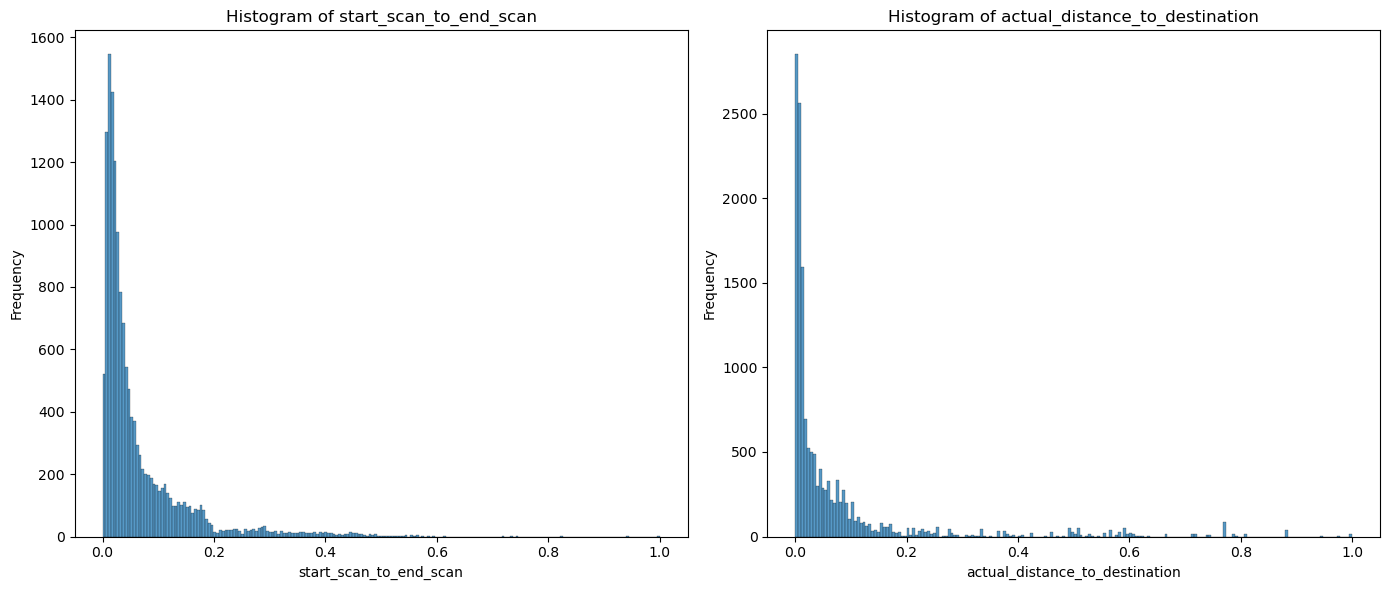

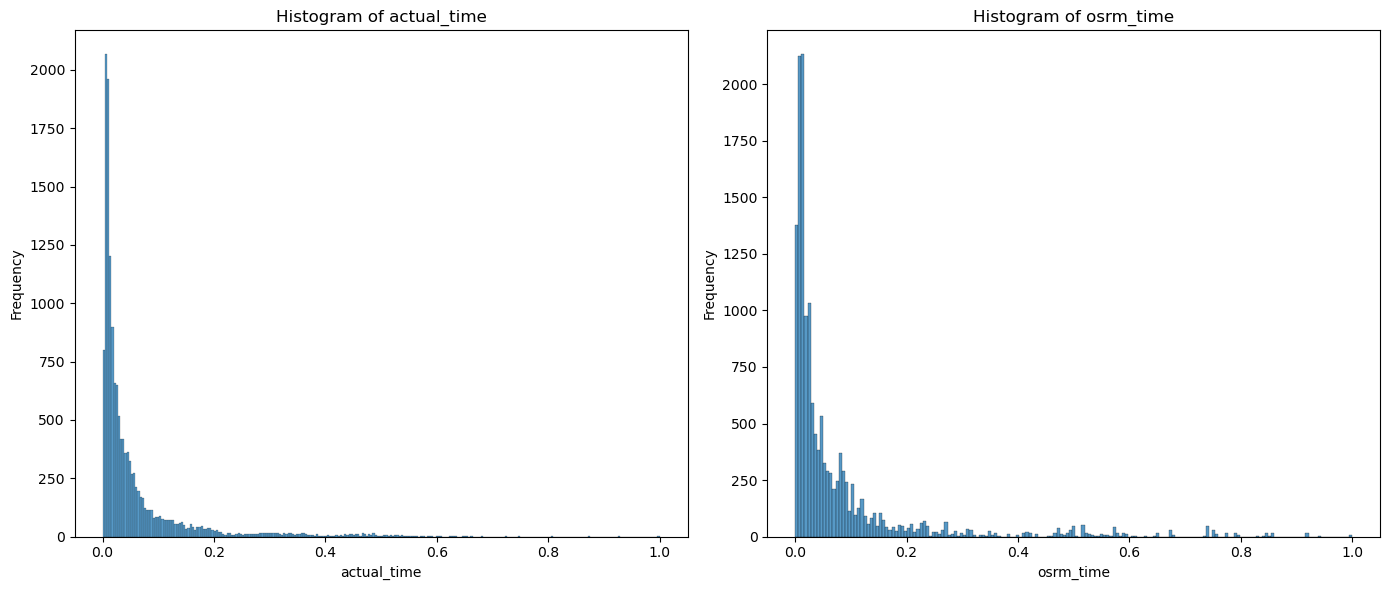

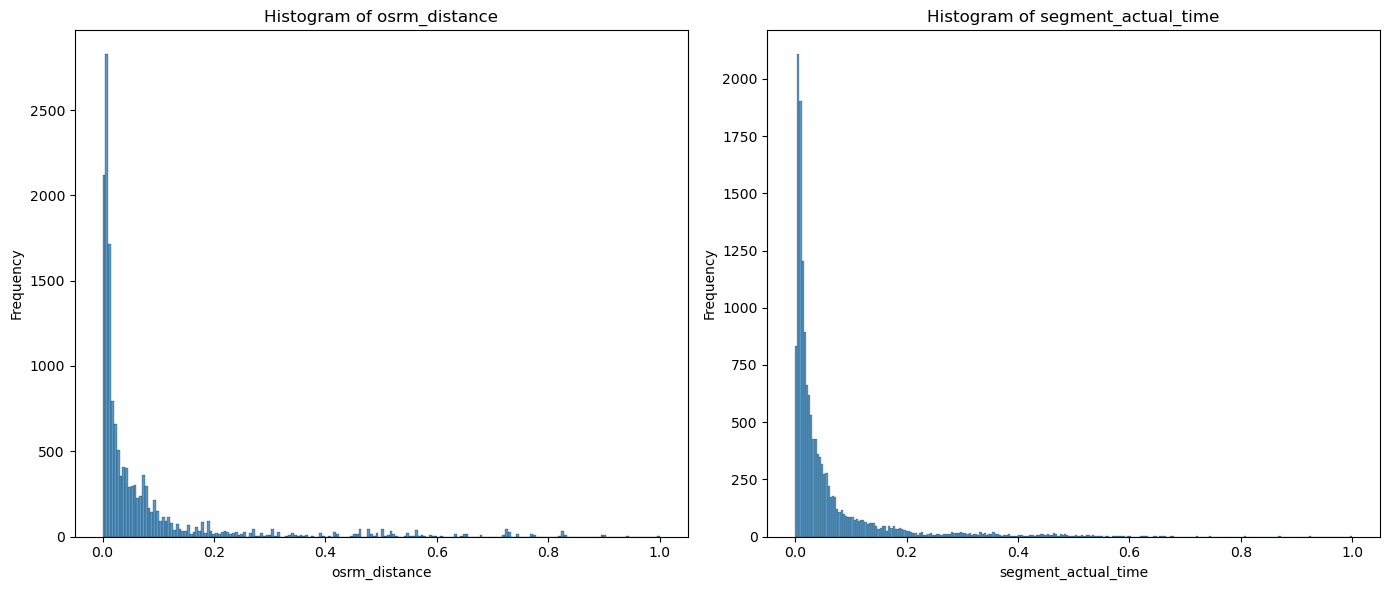

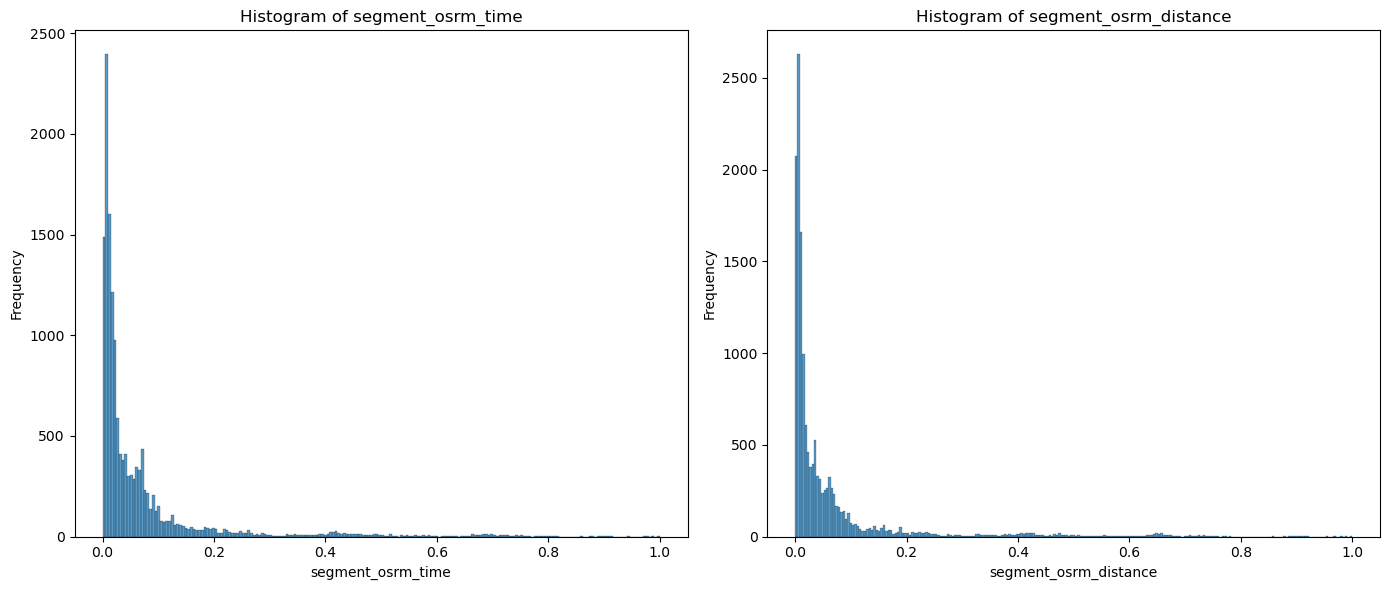

In [116]:
for i in range(0, len(std_cols), 2):
    plt.figure(figsize=(14, 6))

    for j in range(2):
        if i + j < len(std_cols):
            plt.subplot(1, 2, j+1)
            col = std_cols[i + j]
            sns.histplot(df_aggid[col])
            plt.title(f'Histogram of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


# Visualization 

In [117]:
df_aggid.columns

Index(['trip_uuid', 'source_center', 'destination_center', 'data',
       'route_type', 'trip_creation_time', 'source_name', 'destination_name',
       'od_total_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'source_state', 'source_city', 'source_place',
       'source_code', 'destination_state', 'destination_city',
       'destination_place', 'destination_code', 'year', 'month', 'week', 'day',
       'created_hour', 'time_range', 'Carting_encoded', 'FTL_encoded'],
      dtype='object')

<Axes: ylabel='count'>

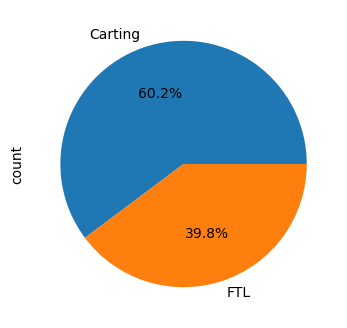

In [118]:
# cat_types = df_aggid.select_dtypes(include='int32')
df_aggid['route_type'].value_counts().plot(kind='pie',autopct='%1.1f%%', figsize=(6,4))

<Axes: ylabel='count'>

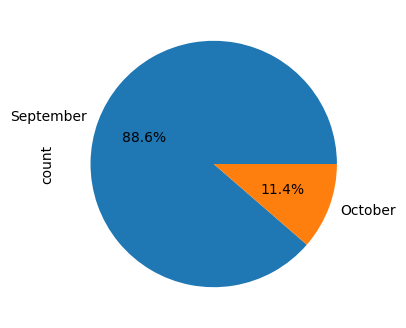

In [119]:
df_aggid['month'].value_counts().plot(kind='pie', autopct= '%1.1f%%', figsize=(6,4))

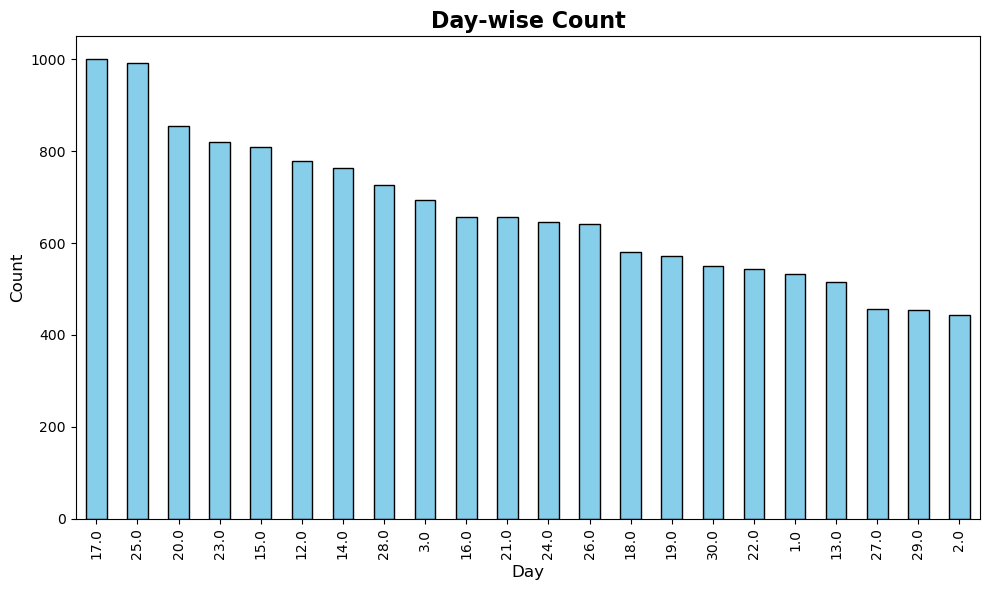

In [120]:
df_day = df_aggid['day'].value_counts()

plt.figure(figsize=(10, 6))  
df_day.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Day-wise Count", fontsize=16, weight='bold')
plt.xlabel("Day", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


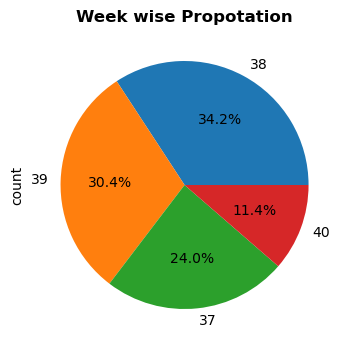

In [121]:
plt.title('Week wise Propotation', weight='bold')
df_aggid['week'].value_counts().plot(kind='pie', figsize=(4,6), autopct ='%1.1f%%')
plt.show()

In [122]:
day_df = df_aggid.groupby('day')['trip_uuid'].count().to_frame().reset_index()
day_df.head()

,day,trip_uuid
0,1.0,533
1,2.0,444
2,3.0,693
3,12.0,779
4,13.0,516


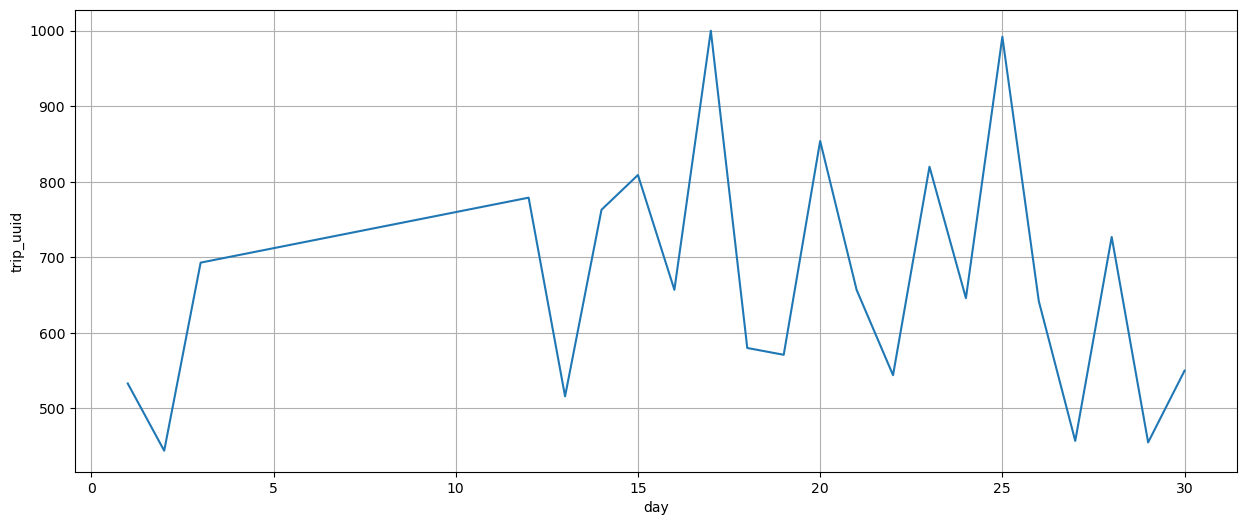

In [123]:
plt.figure(figsize = (15, 6))
sns.lineplot(data=day_df,
             x=day_df['day'],
             y=day_df['trip_uuid'],
            markers = '0')
# plt.xticks(range(1, 32))
plt.grid('both')
plt.show()

In [124]:
week_df = df_aggid.groupby('week')['trip_uuid'].count().reset_index()
week_df.head()

,week,trip_uuid
0,37,3524
1,38,5026
2,39,4469
3,40,1670


In [125]:
# plt.figure(figsize = (15, 6))
# sns.lineplot(data=week_df,
#              x=week_df['week'],
#              y=week_df['trip_uuid'],
#             markers = '0')
# plt.grid('both')
# plt.plot()

In [126]:
df_source_state = df_aggid.groupby('source_state')['trip_uuid'].count().sort_values(ascending=False).to_frame().reset_index()
df_source_state['Cummulative_sum']= df_source_state['trip_uuid'].cumsum()
df_source_state['Percentage']= np.round(df_source_state['trip_uuid']/ (df_source_state['trip_uuid'].sum())*100,2)
df_source_state

,source_state,trip_uuid,Cummulative_sum,Percentage
0,Maharashtra,2714,2714,18.35
1,Karnataka,2143,4857,14.49
2,Haryana,1823,6680,12.33
3,Tamil Nadu,1039,7719,7.03
4,Telangana,784,8503,5.30
5,Uttar Pradesh,760,9263,5.14
6,Gujarat,750,10013,5.07
7,Delhi,725,10738,4.90
8,West Bengal,665,11403,4.50
9,Punjab,536,11939,3.62


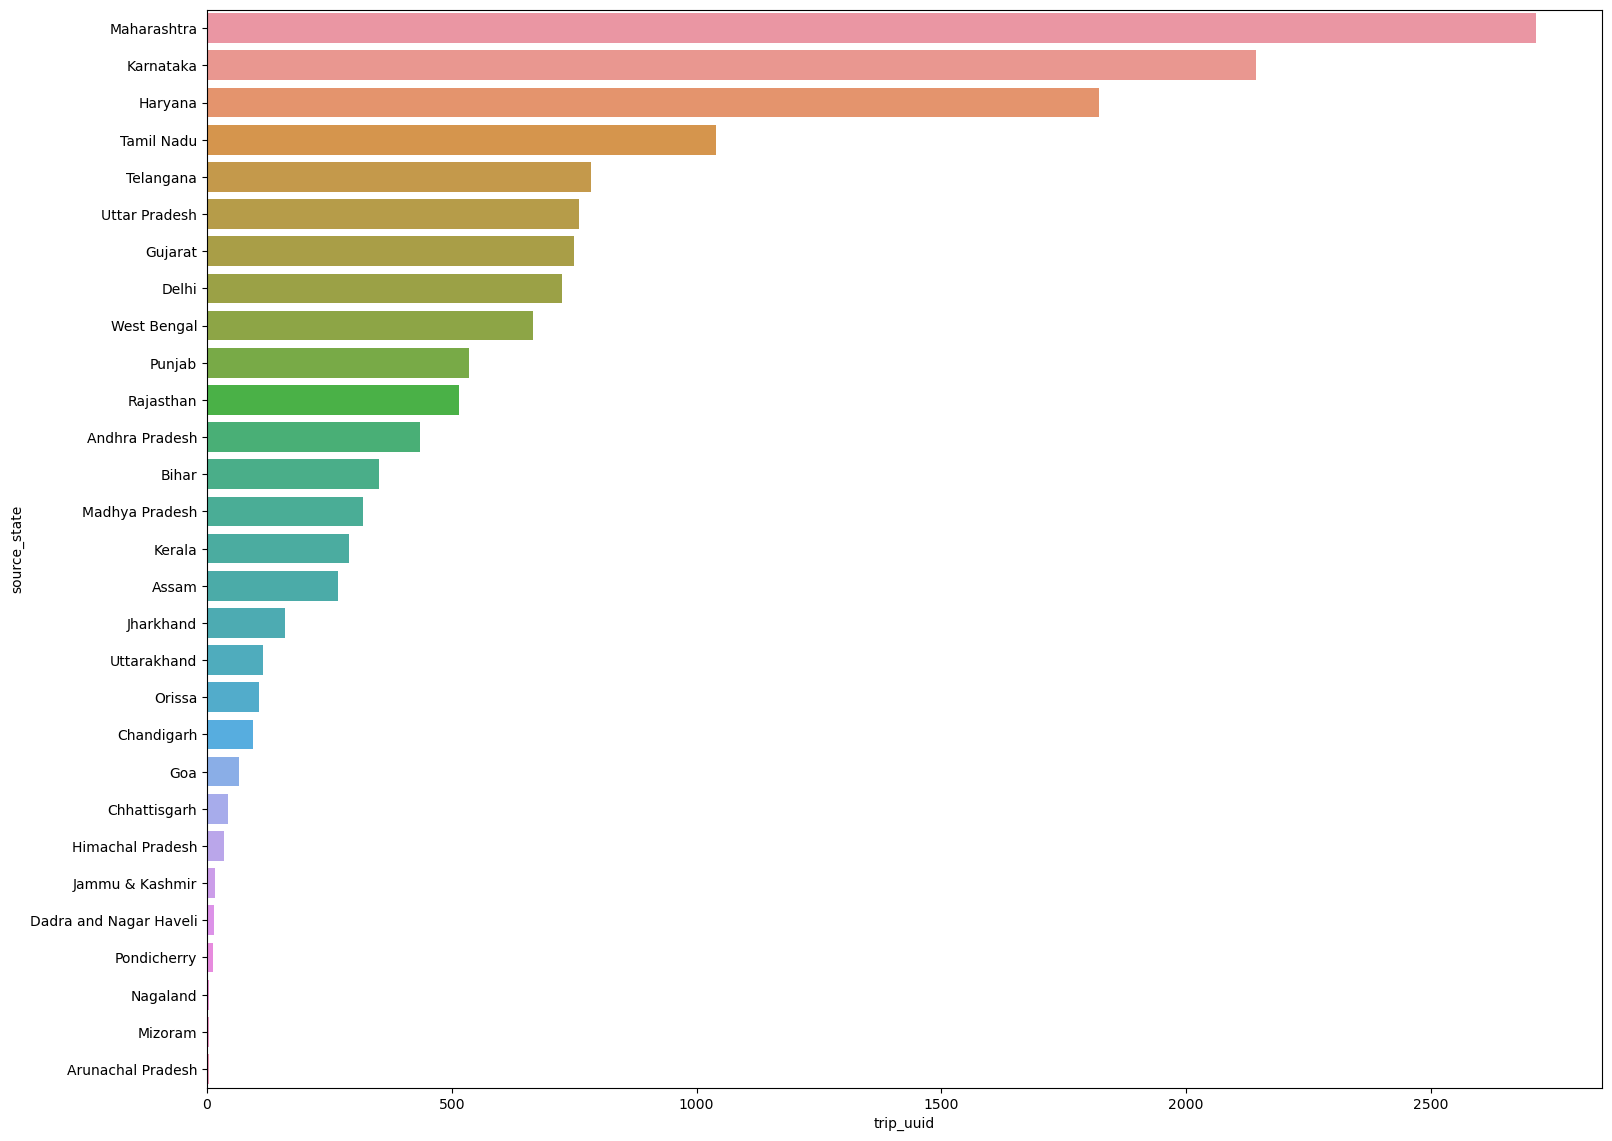

In [127]:
plt.figure(figsize=(18,14))
sns.barplot(data =df_source_state,
            y= df_source_state['source_state'],
            x= df_source_state['trip_uuid'])
plt.show()

In [128]:
df_source_city = df_aggid.groupby('source_city')['trip_uuid'].count().sort_values(ascending=False).to_frame().reset_index()
df_source_city['Cummulative_sum']= df_source_city['trip_uuid'].cumsum()
df_source_city['Percentage']= np.round(df_source_city['trip_uuid']/ (df_source_city['trip_uuid'].sum())*100,2)
df_source_city = df_source_city[:30]
df_source_city

,source_city,trip_uuid,Cummulative_sum,Percentage
0,Gurgaon,1120,1120,7.57
1,Bengaluru,1052,2172,7.11
2,Bhiwandi,697,2869,4.71
3,Bangalore,648,3517,4.38
4,Mumbai,642,4159,4.34
5,Delhi,532,4691,3.60
6,Hyderabad,515,5206,3.48
7,Pune,461,5667,3.12
8,Mumbai Hub,300,5967,2.03
9,Kolkata,281,6248,1.90


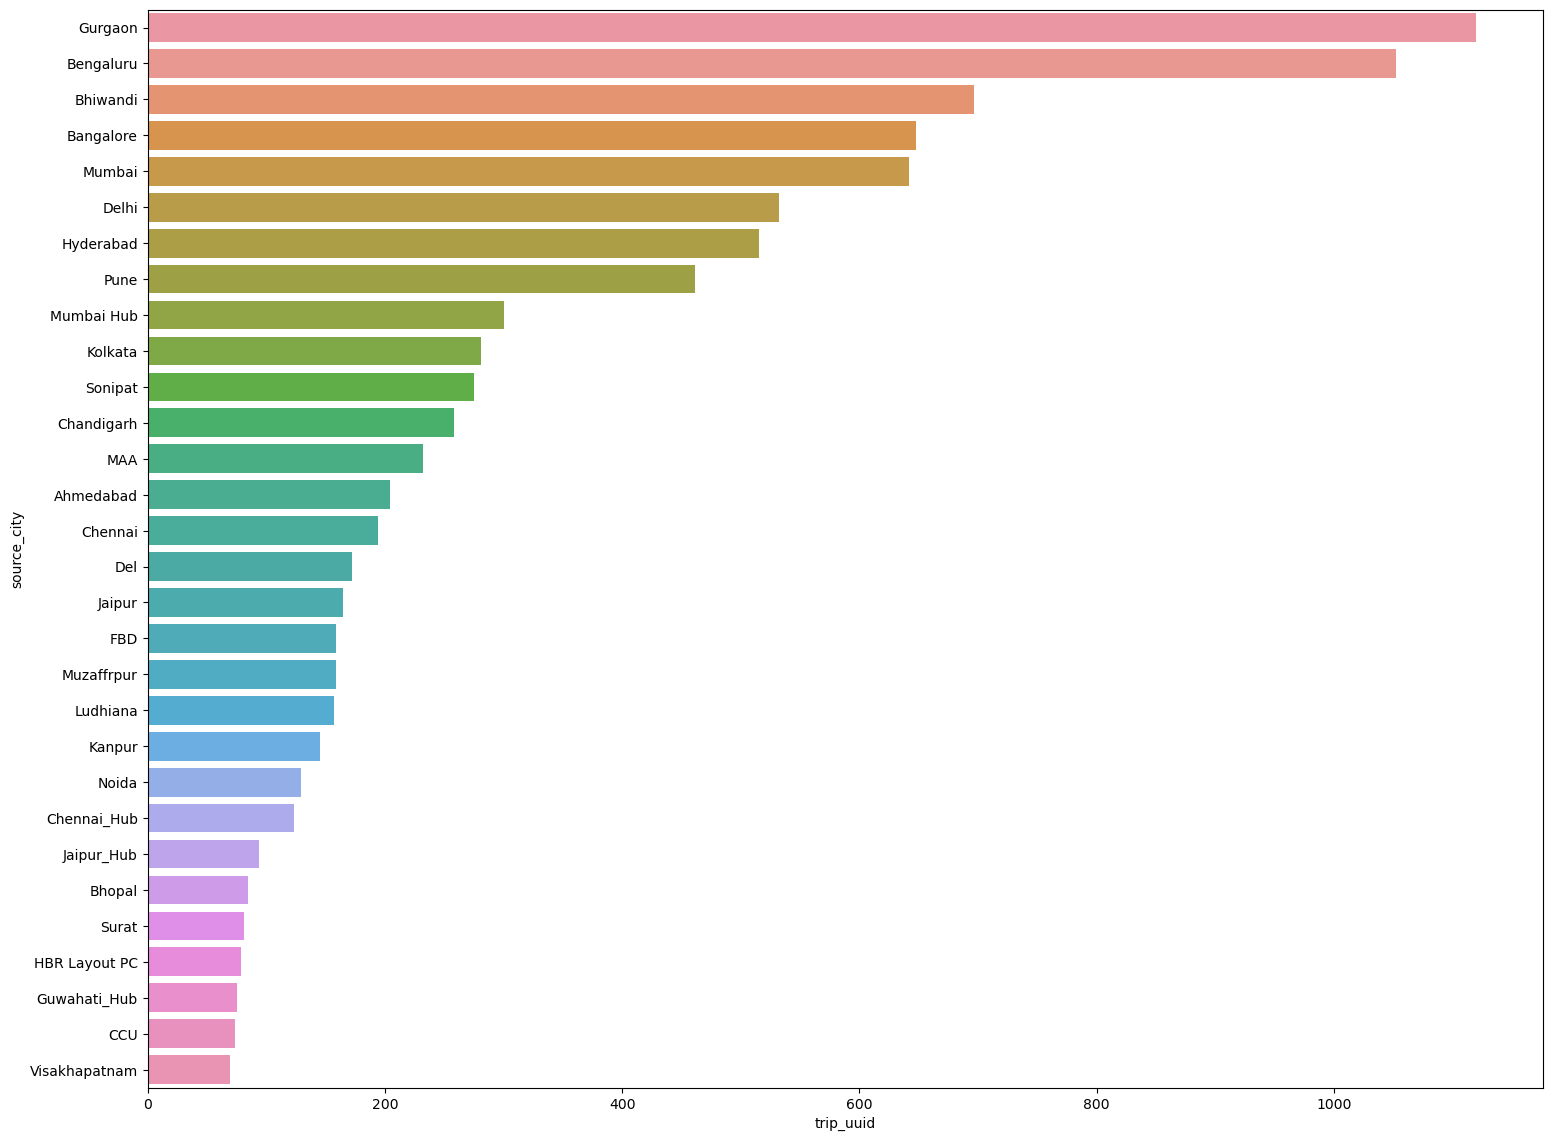

In [129]:
plt.figure(figsize=(18,14))
sns.barplot(data =df_source_city,
            y= df_source_city['source_city'],
            x= df_source_city['trip_uuid'])
plt.show()

In [130]:
df_source_place = df_aggid.groupby('source_place')['trip_uuid'].count().sort_values(ascending=False).to_frame().reset_index()
df_source_place['Cummulative_sum']= df_source_place['trip_uuid'].cumsum()
df_source_place['Percentage']= np.round(df_source_place['trip_uuid']/ (df_source_place['trip_uuid'].sum())*100,2)
df_source_place = df_source_place[:30]
df_source_place

,source_place,trip_uuid,Cummulative_sum,Percentage
0,Bilaspur,1074,1074,8.34
1,Central,885,1959,6.87
2,Mankoli,697,2656,5.41
3,Nelmngla,625,3281,4.85
4,Bomsndra,457,3738,3.55
5,Tathawde,396,4134,3.08
6,KGAirprt,295,4429,2.29
7,Shamshbd,278,4707,2.16
8,Dankuni,245,4952,1.90
9,East,240,5192,1.86


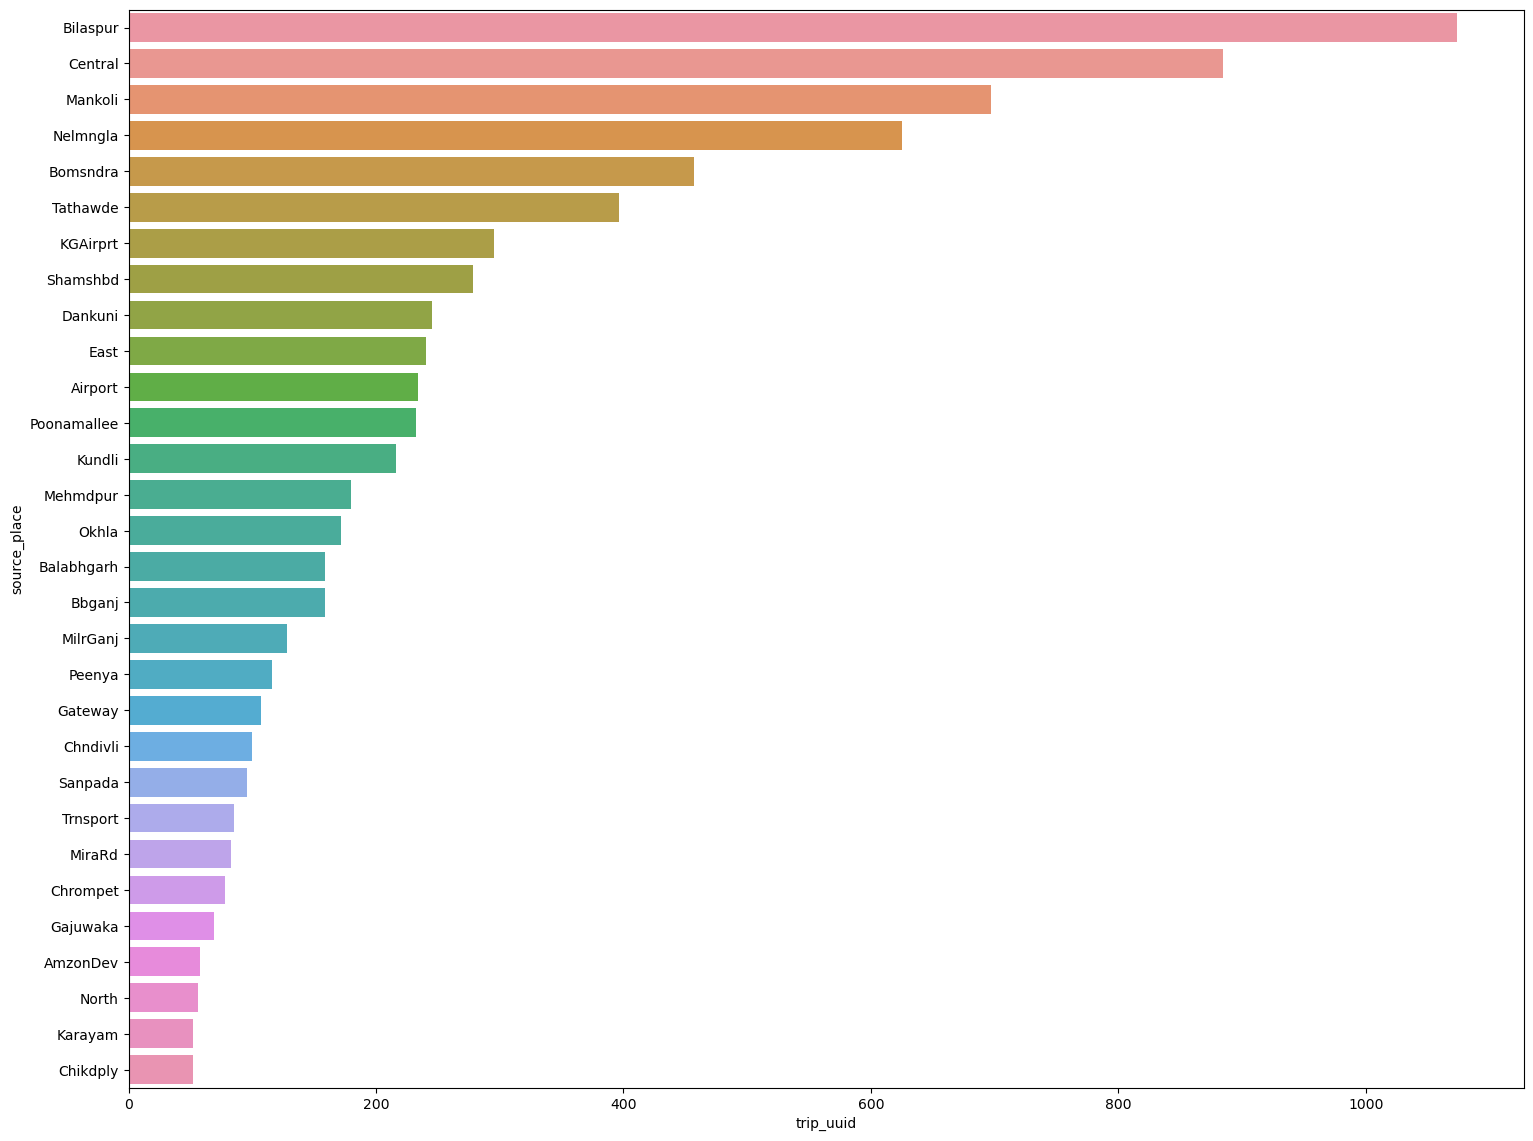

In [131]:
plt.figure(figsize=(18,14))
sns.barplot(data =df_source_place,
            y= df_source_place['source_place'],
            x= df_source_place['trip_uuid'])
plt.show()

In [132]:
df_source_code = df_aggid.groupby('source_code')['trip_uuid'].count().sort_values(ascending=False).to_frame().reset_index()
df_source_code['Cummulative_sum']= df_source_code['trip_uuid'].cumsum()
df_source_code['Percentage']= np.round(df_source_code['trip_uuid']/ (df_source_code['trip_uuid'].sum())*100,2)
df_source_code = df_source_code[:30]
df_source_code

,source_code,trip_uuid,Cummulative_sum,Percentage
0,HB,3211,3211,24.94
1,D,2399,5610,18.63
2,H,2244,7854,17.43
3,I,1077,8931,8.37
4,IP,557,9488,4.33
5,DPC,439,9927,3.41
6,L,429,10356,3.33
7,DC,333,10689,2.59
8,PC,313,11002,2.43
9,H_1,247,11249,1.92


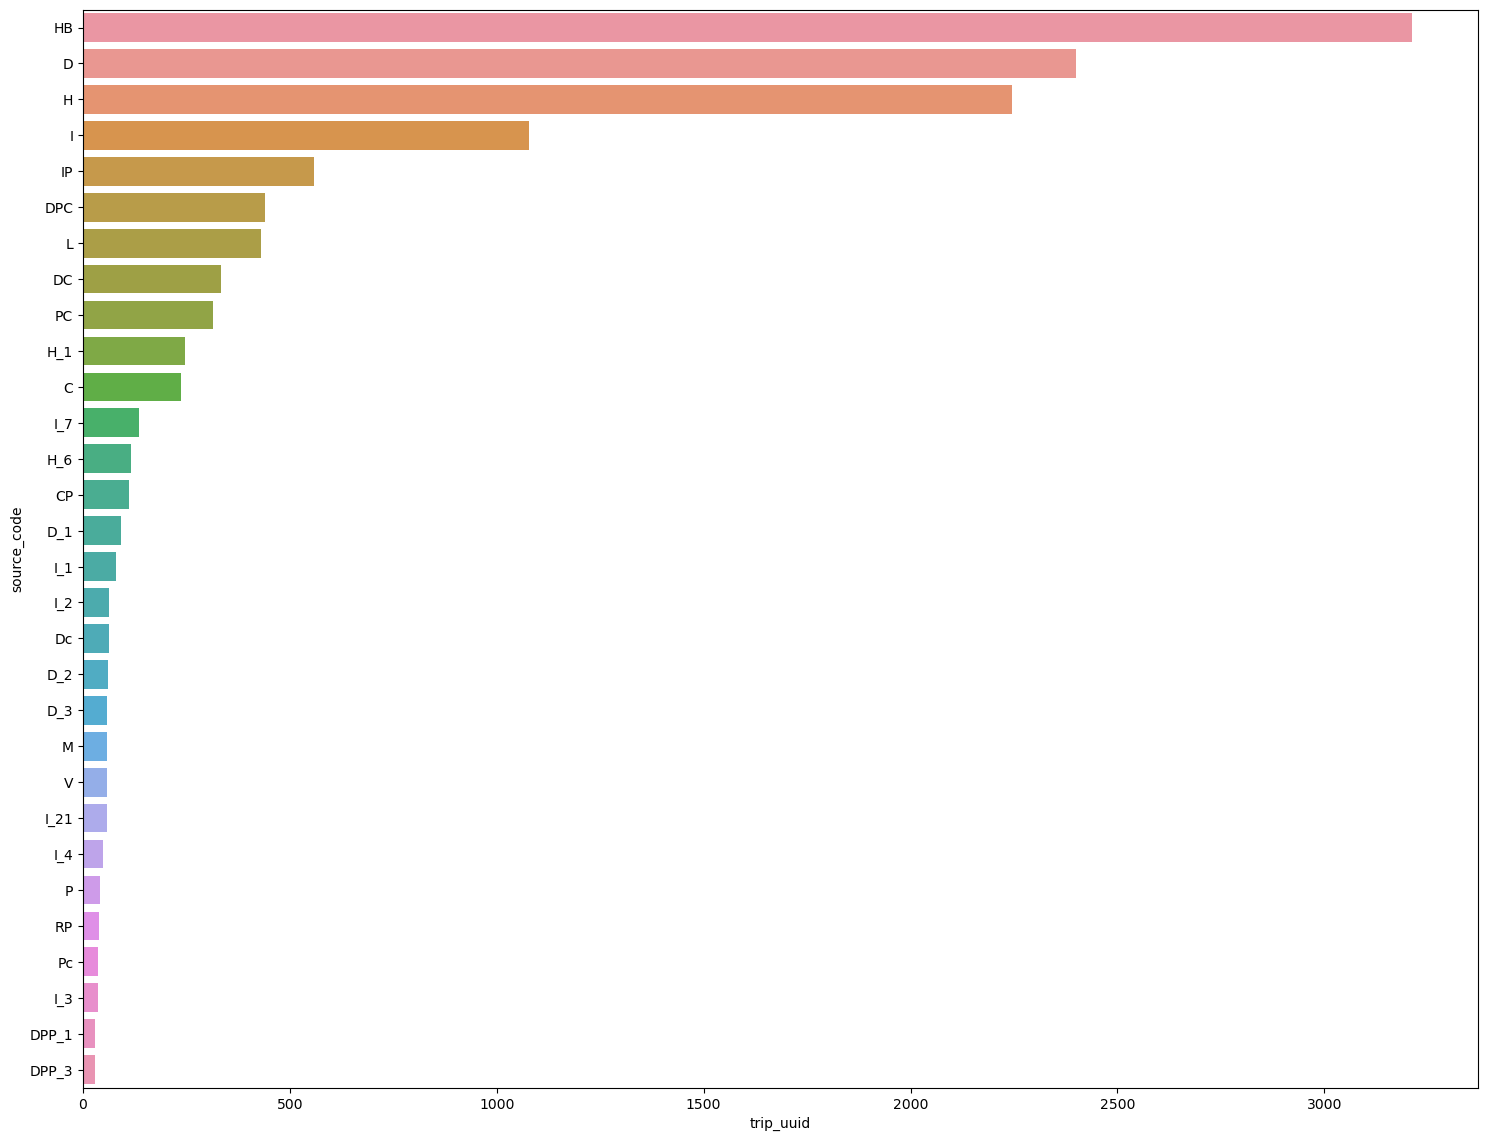

In [133]:
plt.figure(figsize=(18,14))
sns.barplot(data =df_source_code,
            y= df_source_code['source_code'],
            x= df_source_code['trip_uuid'])
plt.show()

In [134]:
df_dest_state = df_aggid.groupby('destination_state')['trip_uuid'].count().sort_values(ascending=False).to_frame().reset_index()
df_dest_state['Cummulative_sum']= df_dest_state['trip_uuid'].cumsum()
df_dest_state['Percentage']= np.round(df_dest_state['trip_uuid']/ (df_dest_state['trip_uuid'].sum())*100,2)
# df_dest_state = df_dest_state[:30]
df_dest_state

,destination_state,trip_uuid,Cummulative_sum,Percentage
0,Maharashtra,2561,2561,17.32
1,Karnataka,2294,4855,15.51
2,Haryana,1640,6495,11.09
3,Tamil Nadu,1084,7579,7.33
4,Uttar Pradesh,805,8384,5.44
5,Telangana,784,9168,5.30
6,Gujarat,734,9902,4.96
7,West Bengal,697,10599,4.71
8,Delhi,657,11256,4.44
9,Punjab,617,11873,4.17


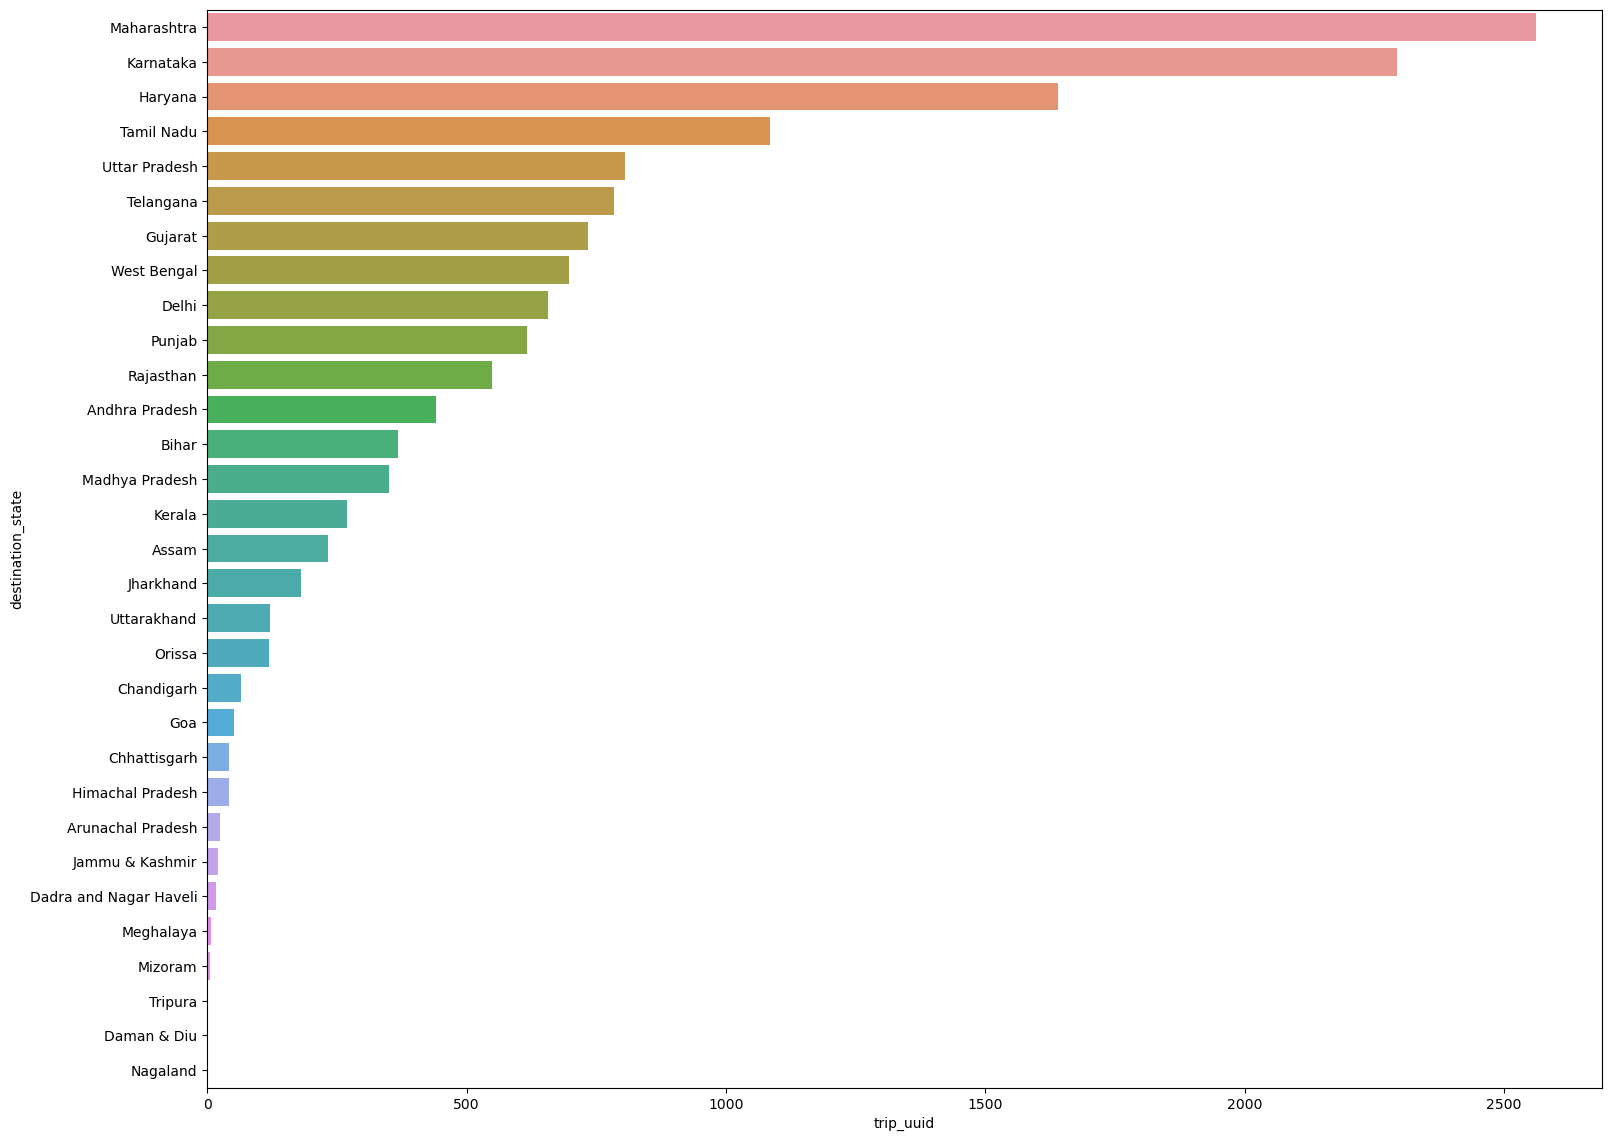

In [135]:
plt.figure(figsize=(18,14))
sns.barplot(data =df_dest_state,
            y= df_dest_state['destination_state'],
            x= df_dest_state['trip_uuid'])
plt.show()

In [136]:
df_dest_city = df_aggid.groupby('destination_city')['trip_uuid'].count().sort_values(ascending=False).to_frame().reset_index()
df_dest_city['Cummulative_sum']= df_dest_city['trip_uuid'].cumsum()
df_dest_city['Percentage']= np.round(df_dest_city['trip_uuid']/ (df_dest_city['trip_uuid'].sum())*100,2)
df_dest_city = df_dest_city[:30]
df_dest_city

,destination_city,trip_uuid,Cummulative_sum,Percentage
0,Bengaluru,1088,1088,7.36
1,Mumbai,965,2053,6.53
2,Gurgaon,865,2918,5.85
3,Bangalore,551,3469,3.73
4,Delhi,539,4008,3.65
5,Hyderabad,499,4507,3.37
6,Bhiwandi,434,4941,2.94
7,Chennai,329,5270,2.22
8,Sonipat,322,5592,2.18
9,Chandigarh,322,5914,2.18


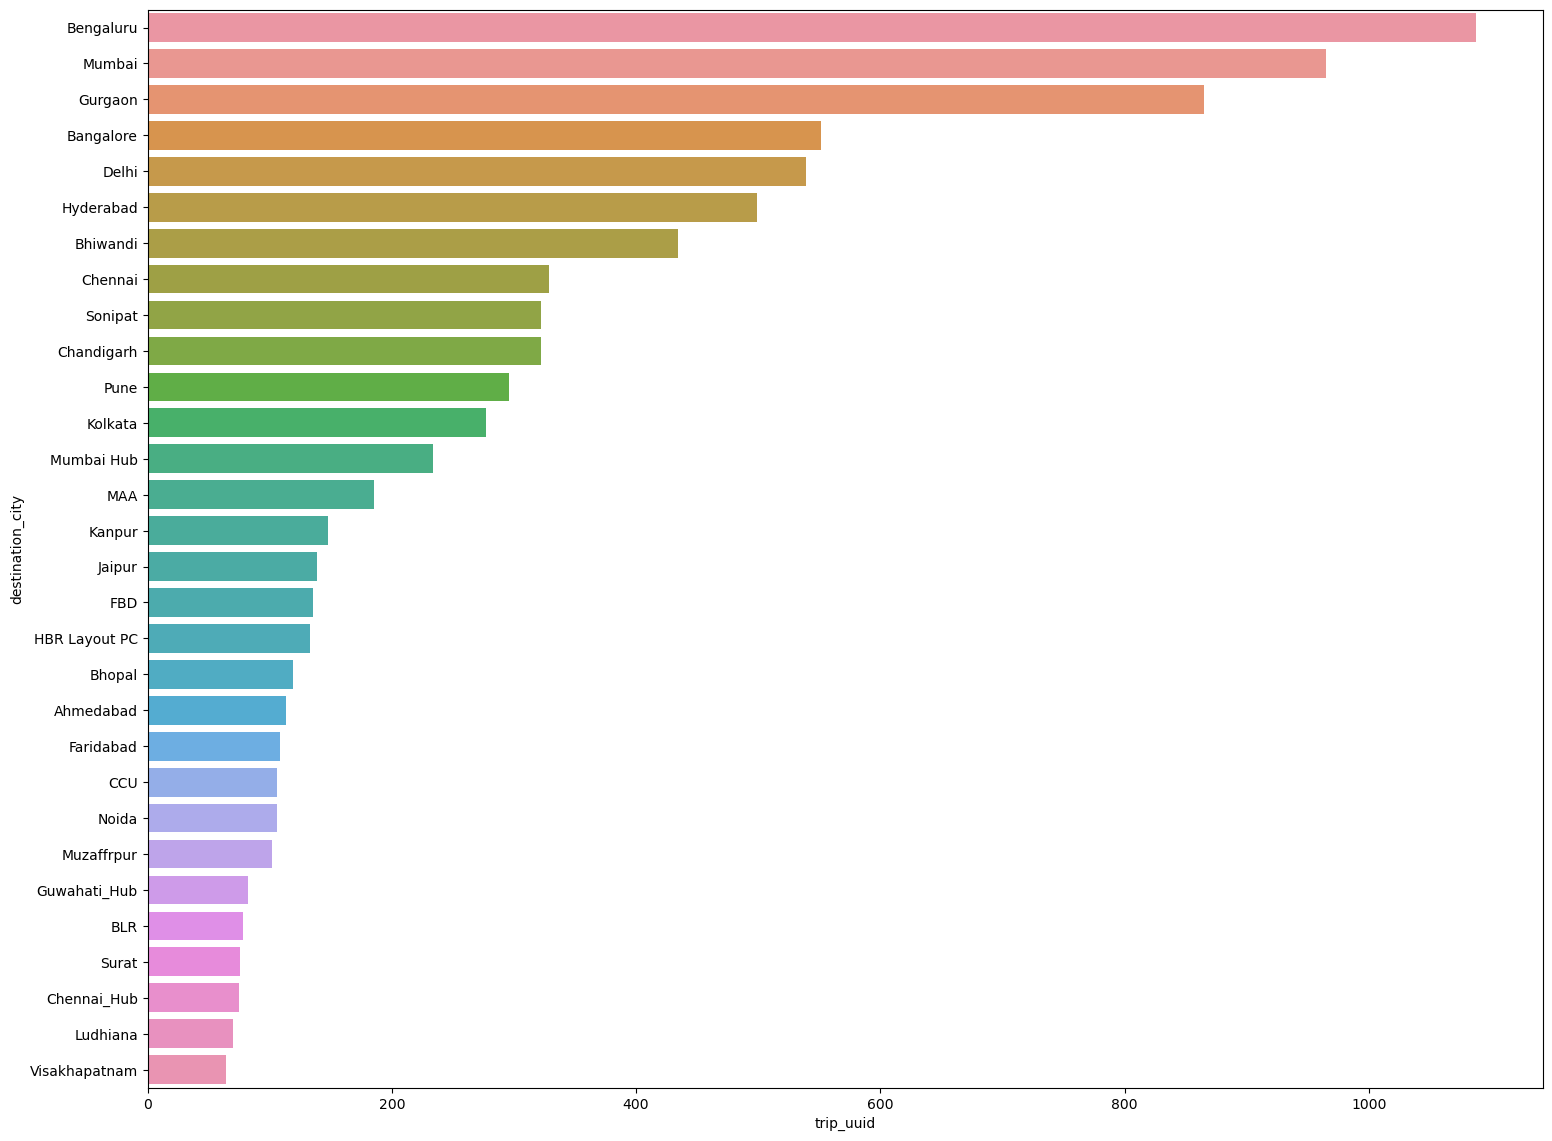

In [137]:
plt.figure(figsize=(18,14))
sns.barplot(data =df_dest_city,
            y= df_dest_city['destination_city'],
            x= df_dest_city['trip_uuid'])
plt.show()

In [138]:
df_dest_place = df_aggid.groupby('destination_place')['trip_uuid'].count().sort_values(ascending=False).to_frame().reset_index()
df_dest_place['Cummulative_sum']= df_dest_place['trip_uuid'].cumsum()
df_dest_place['Percentage']= np.round(df_dest_place['trip_uuid']/ (df_dest_place['trip_uuid'].sum())*100,2)
df_dest_place = df_dest_place[:25]
df_dest_place

,destination_place,trip_uuid,Cummulative_sum,Percentage
0,Bilaspur,864,864,6.75
1,Central,842,1706,6.58
2,Nelmngla,548,2254,4.28
3,Mankoli,434,2688,3.39
4,Bomsndra,346,3034,2.70
5,Shamshbd,339,3373,2.65
6,Kundli,320,3693,2.50
7,Mehmdpur,274,3967,2.14
8,KGAirprt,272,4239,2.13
9,Tathawde,258,4497,2.02


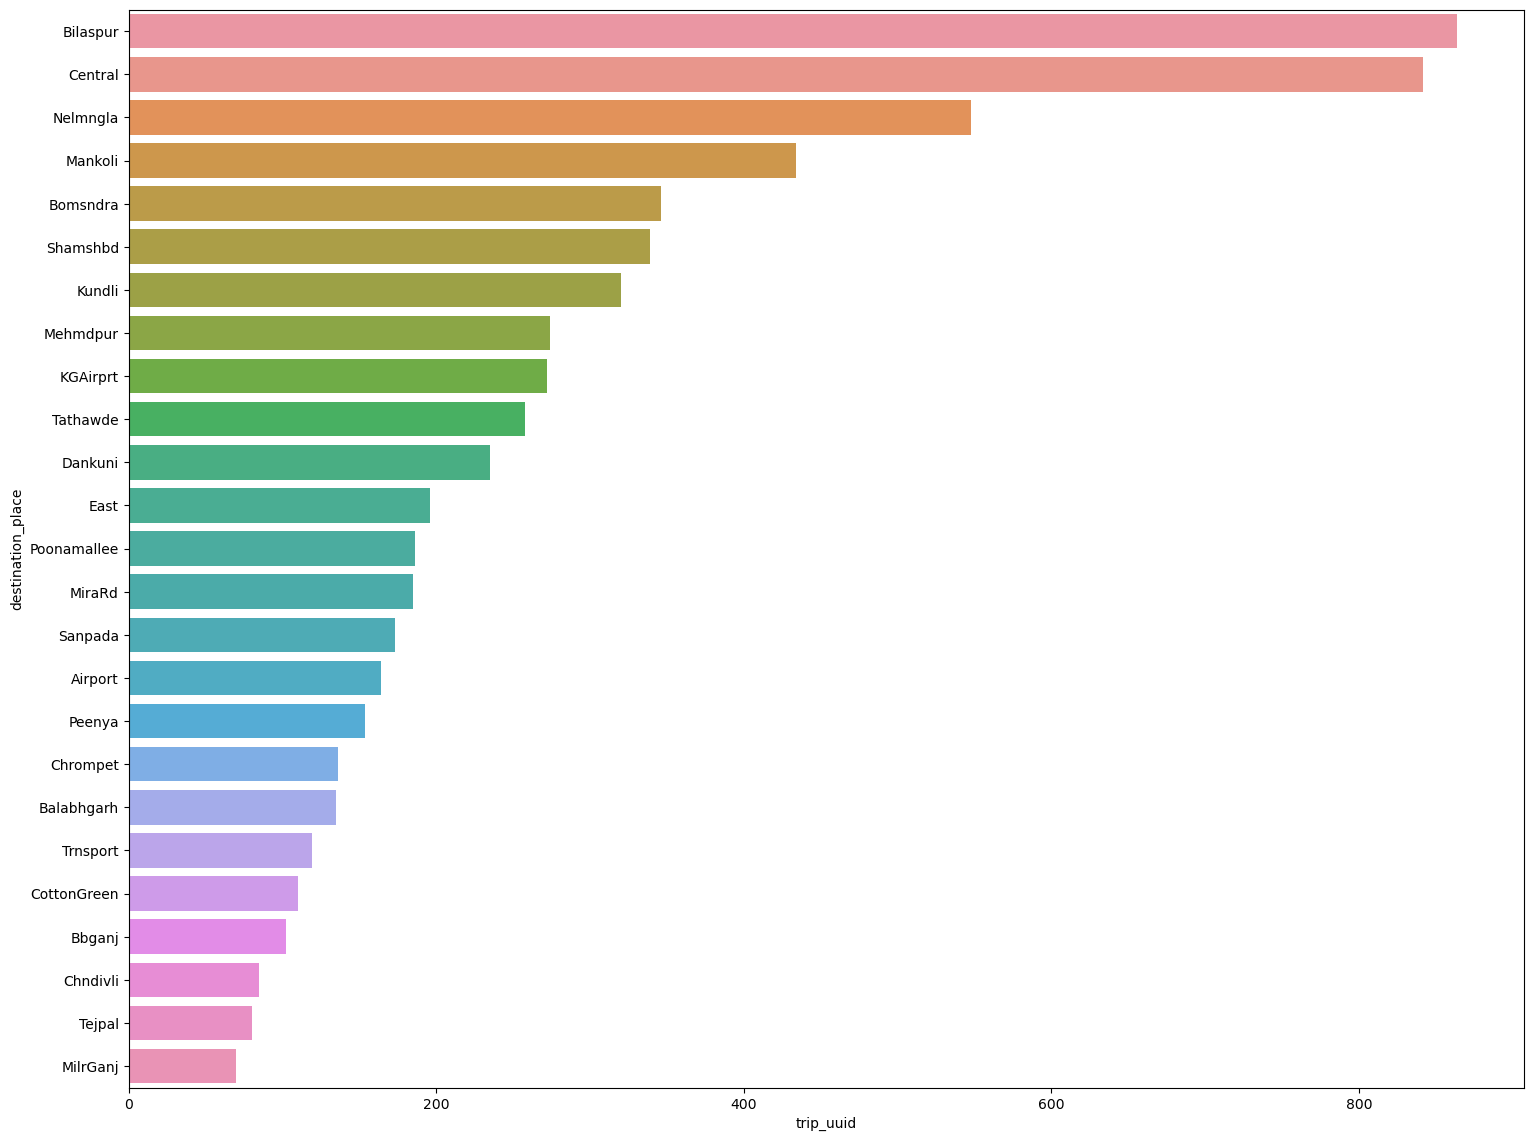

In [139]:
plt.figure(figsize=(18,14))
sns.barplot(data =df_dest_place,
            y= df_dest_place['destination_place'],
            x= df_dest_place['trip_uuid'])
plt.show()

In [140]:
df_dest_code = df_aggid.groupby('destination_code')['trip_uuid'].count().sort_values(ascending=False).to_frame().reset_index()
df_dest_code['Cummulative_sum']= df_dest_code['trip_uuid'].cumsum()
df_dest_code['Percentage']= np.round(df_dest_code['trip_uuid']/ (df_dest_code['trip_uuid'].sum())*100,2)
df_dest_code = df_dest_code[:30]
df_dest_code

,destination_code,trip_uuid,Cummulative_sum,Percentage
0,D,2883,2883,22.53
1,HB,2290,5173,17.90
2,H,2100,7273,16.41
3,I,1192,8465,9.32
4,DPC,710,9175,5.55
5,IP,704,9879,5.50
6,L,597,10476,4.67
7,DC,401,10877,3.13
8,PC,243,11120,1.90
9,P,224,11344,1.75


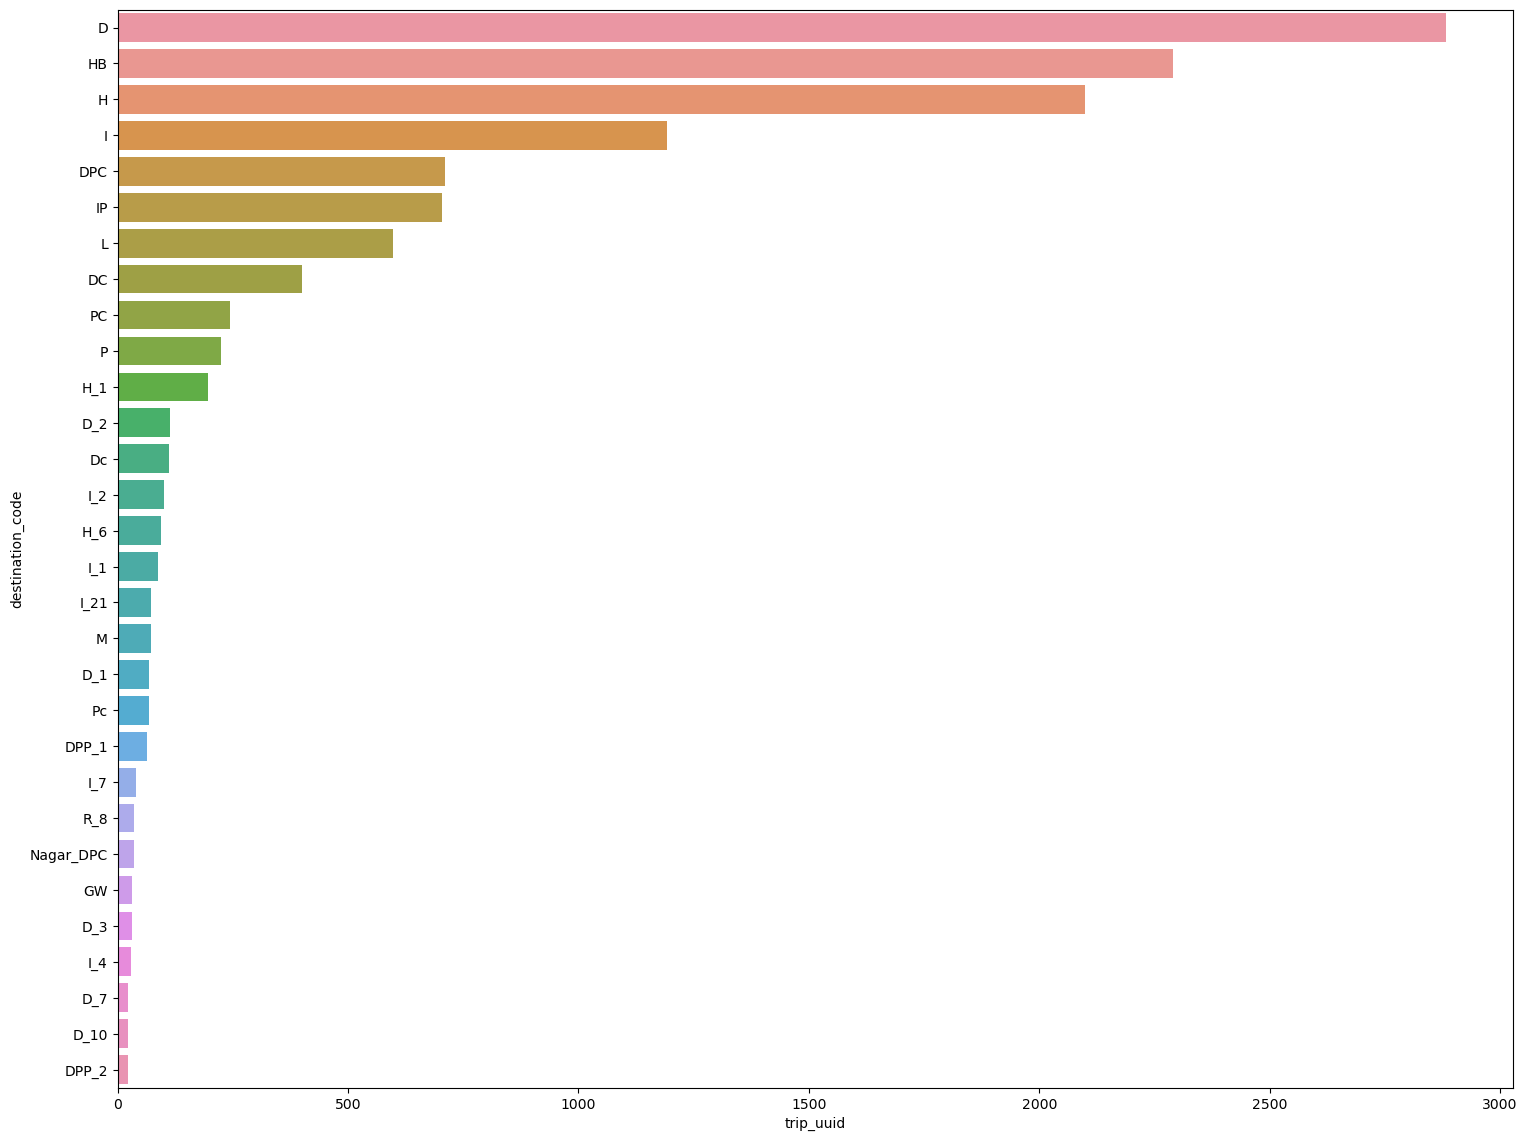

In [141]:
plt.figure(figsize=(18,14))
sns.barplot(data =df_dest_code,
            y= df_dest_code['destination_code'],
            x= df_dest_code['trip_uuid'])
plt.show()

In [142]:
num_cols = df_aggid[['od_total_time',
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance']]
num_cols.isnull().sum()

od_total_time                     0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

In [143]:
df_corr = num_cols.corr()
df_corr

,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
od_total_time,1.000000,0.999999,0.919074,0.961560,0.927416,0.925126,0.961582,0.919358,0.920099
start_scan_to_end_scan,0.999999,1.000000,0.919159,0.961612,0.927471,0.925205,0.961634,0.919429,0.920191
actual_distance_to_destination,0.919074,0.919159,1.000000,0.953920,0.993568,0.997268,0.952987,0.987542,0.993068
actual_time,0.961560,0.961612,0.953920,1.000000,0.958781,0.959398,0.999989,0.954044,0.957151
osrm_time,0.927416,0.927471,0.993568,0.958781,1.000000,0.997588,0.957955,0.993263,0.991624
osrm_distance,0.925126,0.925205,0.997268,0.959398,0.997588,1.000000,0.958540,0.991802,0.994712
segment_actual_time,0.961582,0.961634,0.952987,0.999989,0.957955,0.958540,1.000000,0.953214,0.956293
segment_osrm_time,0.919358,0.919429,0.987542,0.954044,0.993263,0.991802,0.953214,1.000000,0.996098
segment_osrm_distance,0.920099,0.920191,0.993068,0.957151,0.991624,0.994712,0.956293,0.996098,1.000000


[]

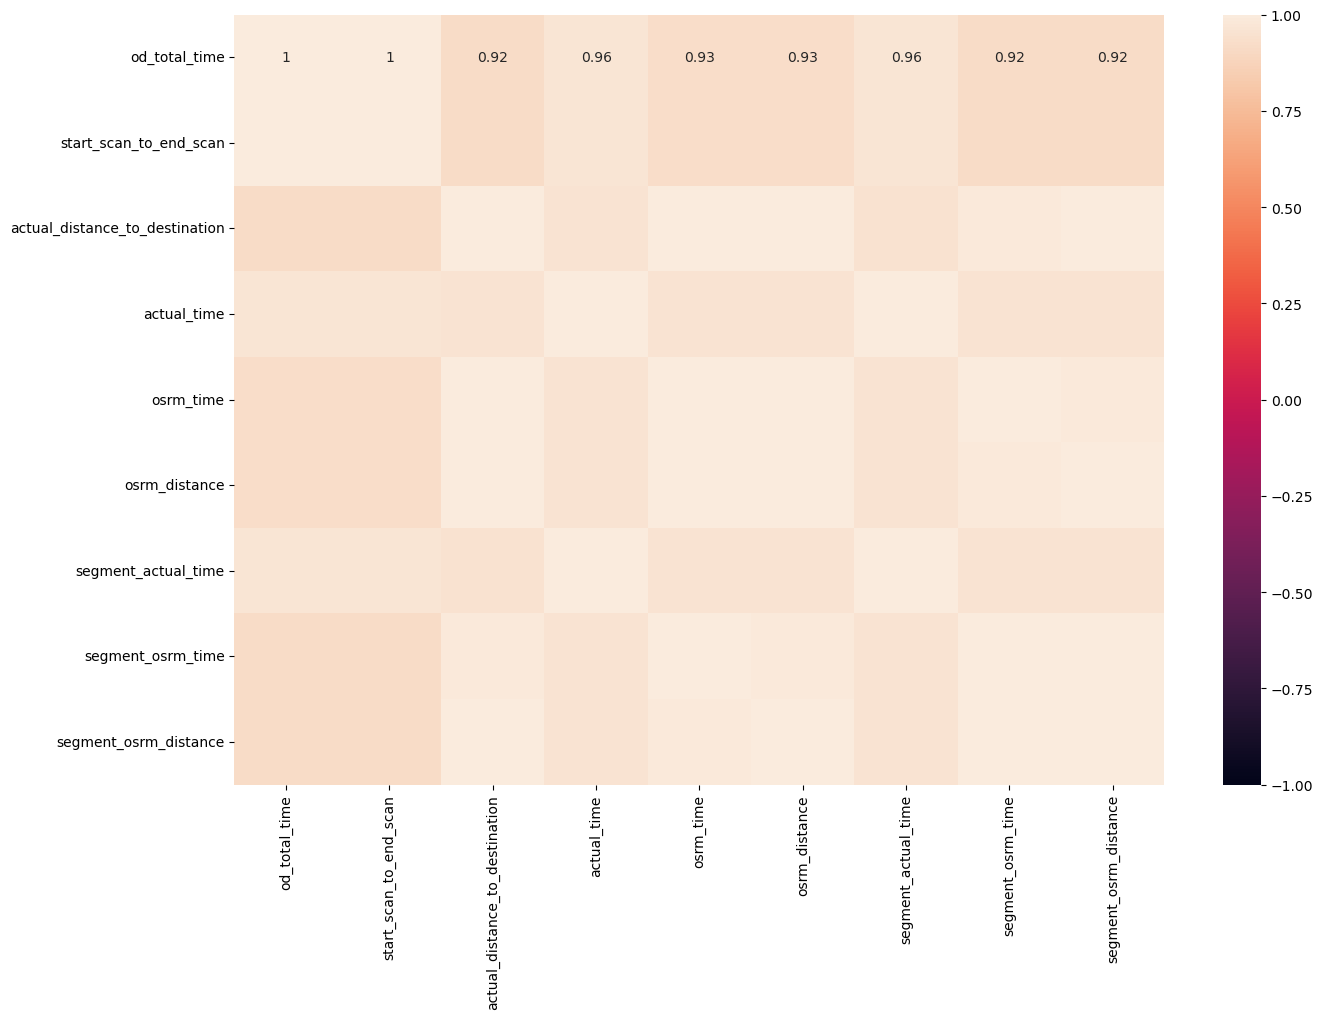

In [144]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_corr, vmin = -1, vmax = 1, annot = True)
plt.plot()

---

### 📊 **Dataset Insights Summary**

#### 🚚 **Route Type Distribution**
- The dataset contains two route types:
  - **Carting**: ~60%
  - **FTL (Full Truck Load)**: ~39%

#### 📆 **Month-wise Distribution**
- **September** contributes the majority of the data: **~88%**
- **October** contributes the remaining: **~12%**

#### 🗓️ **Day-wise Trends**
- Most orders were placed in the **2nd and 3rd weeks** of the month.
- The **highest number of orders** occurred on the **21st** of the month.
- The **lowest number of orders** occurred on the **31st**.

#### 📅 **Week-wise Distribution**
- The dataset includes data from **Weeks 37 to 40**.
  - **Week 38**: ~34%
  - **Week 39**: ~30%
  - **Week 37**: ~24%
  - **Week 40**: ~12%

#### 🗺️ **Source State Distribution**
- **Top contributing states** (~57.5% combined):
  - Maharashtra, Karnataka, Haryana, Tamil Nadu, Telangana
- **Least contributing states** (~0.27% combined):
  - Dadra and Nagar Haveli, Pondicherry, Nagaland, Mizoram, Arunachal Pradesh  
  ⚠️ These are mostly **eastern states and union territories**, possibly affected by **connectivity issues**.

#### 🏙️ **Top Source Cities**
- Major source cities (Tier-I) contributing ~28.11%:
  - Gurgaon, Bengaluru, Bhiwandi, Bangalore, Mumbai

#### 🎯 **Destination State Distribution**
- **Top 5 destination states** (~56.69% combined):
  - Karnataka, Haryana, Tamil Nadu, Uttar Pradesh, and one more (you might want to list it explicitly).
- **Lowest contributing states**:
  - Meghalaya, Mizoram, Tripura, Daman & Diu, Nagaland

---


---

## 📈 **Business Insights from Dataset & EDA**

### 1. **Route Optimization & Fleet Management**
- **Carting dominates the dataset (60%)**, suggesting frequent smaller shipments. Optimize routing and scheduling for carting operations to improve efficiency and reduce costs.
- **FTL accounts for 39%**: Larger shipments might need better coordination or fewer trips. Evaluate if underutilized FTL trips can be consolidated or re-routed.

---

### 2. **Seasonal & Weekly Demand Patterns**
- **September alone contributes 88% of the data**.
  - September could be a seasonal demand peak—possibly linked to festivals or quarter-end cycles.
  - Prepare additional resources (fleet, manpower) in August to meet expected September surge.
- **Highest order volume occurs mid-month (especially around the 21st)**.
  -  Mid-month might need dynamic capacity scaling or shift planning.
- **Week 38 is peak (34%), Week 40 is the lowest (12%)**
  - Using this insight for *demand forecasting* and shift planning.

---

### 3. **Geographical Distribution – Market Penetration**
- **Top source states (Maharashtra, Karnataka, Haryana, etc.) account for 57.5%**.
  - Strengthen infrastructure in these key states.
- **Low-contribution states (e.g., Mizoram, Pondicherry) are mostly from Eastern regions or union territories.**
  - Low market presence may be due to poor connectivity. Consider infrastructure development or partnerships if expansion is desired.

---

### 4. **City-Level Operational Insight**
- **Tier-I cities (e.g., Bangalore, Gurgaon, Mumbai) contribute over 28% of dispatches**.
  -  Focus on performance KPIs in these cities—delays, service quality, and customer satisfaction will have a wider impact.

---

### 5. **Data Distribution & Cleaning Needs**
- **Right-skewed distributions** and **prevalent outliers**, especially in `actual_time` and `segment_actual_time`, signal potential data quality issues.
  - *Operational Risk:* Delivery time estimations could be skewed.
  - *Recommendation:* Apply IQR-based outlier treatment and consider transforming data for model reliability.

---

### 6. **Distance & Time Inconsistencies**
- Mann-Whitney U Tests showed significant differences between:
  - `osrm_time` vs `segment_osrm_time`
  - `osrm_distance` vs `segment_osrm_distance`
  - `actual_time` vs `segment_actual_time`
  - 👉 *Conclusion:* There may be aggregation errors or inconsistencies between segment-level and total trip data.
  - *Action:* Audit your route segmentation and tracking systems to ensure data integrity.

---


---
# Recommendations

- The OSRM trip planning system needs to be improved. Discrepancies need to be catered to for transporters, if the routing engine is configured for optimum results.

- osrm_time and actual_time are different. Team needs to make sure this difference is reduced, so that better delivery time prediction can be made and it becomes convenient for the customer to expect an accurate delivery time.

- The osrm distance and actual distance covered are also not same i.e. maybe the delivery person is not following the predefined route which may lead to late deliveries or the osrm devices is not properly predicting the route based on distance, traffic and other factors. Team needs to look into it.

- Most of the orders are coming from/reaching to states like Maharashtra, Karnataka, Haryana and Tamil Nadu. The existing corridors can be further enhanced to improve the penetration in these areas.

- Customer profiling of the customers belonging to the states Maharashtra, Karnataka, Haryana, Tamil Nadu and Uttar Pradesh has to be done to get to know why major orders are coming from these atates and to improve customers' buying and delivery experience.

- From state point of view, we might have very heavy traffic in certain states and bad terrain conditions in certain states. This will be a good indicator to plan and cater to demand during peak festival seasons.

---